Convert str to seconds

In [4]:
def hmstoseconds(value):
    parts=value.split(':')
    res = int(parts[0])*3600+int(parts[1])*60+float(parts[2])
    return res

Get the time of all algorithms

In [1]:
from matplotlib import pyplot as plt
from random import random

def compare3(dataset_name, location='../experiment_output_20230517', max_risk=1, repeat=5, col=10, 
            max_length=30, title=None):
    test_risks={}
    train_risks={}
    and_counts={}
    aucs={}
    running_times={}
    file_numbers={}
    desc=dataset_name
    max_risk=get_max_risk(dataset_name)
    print(max_risk)
    objs = ['orth', 'gpe','xgb', 'mwg']
    for obj in objs:
        algos = ['fc'] if obj=='orth' else ['boosting'] if obj in ['gpe', 'mwg'] else ['keep']
        search = 'greedy' if obj in ['mwg'] else 'exhaustive'
        for algo in algos:
            methods = ['Newton-CG'] if algo=='fc' else ['']
            for method in methods:
                done = True
                fc_train=[0]*10
                fc_test=[0]*10
                ands = [0]*10
                file_number=0
                running_time=0
                for i in range(repeat):
                    filename = dataset_name + '_' + obj + '_' + algo + '_' + method + '_realkd_col_' + \
                        str(col) + '_rep' + str(i) + '.txt'
                    try:
                        f = open(location+search+'/'+dataset_name+'/'+filename, 'r')
                        file_number+=1
                    except:
                        print(obj, algo, method,'does not exist: ')
                        print(location+search+'/'+dataset_name+'/'+filename)
                        continue
                    j=-1
                    for line in f:
                        if 'iteration ' in line:
                            j+=1
                        if j>=10:
                            break
                        words=line.split(' ')
                        if 'Running time:' in line:
                            running_time += hmstoseconds(words[-1][5:])
                            print(words[-1][5:])
                        if 'fc train risk' in line:
                            fc_train[j] += float(words[-1])
                        elif 'fc test risk' in line:
                            fc_test[j] += float(words[-1])
                        if 'if' in line:
                            ands[j]+=line.count('=')+1
                if done:
                    file_numbers[obj + '_' + algo + '_' + method] = file_number
                    train_risks[obj + '_' + algo + '_' + method]=fc_train
                    test_risks[obj + '_' + algo + '_' + method]=fc_test
                    and_counts[obj + '_' + algo + '_' + method]=ands
                    running_times[obj + '_' + algo + '_' + method]=running_time/max(1, file_number)
                    if file_number==0:
                        continue
                    print(obj + '_' + algo + '_' + method+': avg train risk:',sum(fc_train)/10/max_risk/file_number, 
                          'avg test risk', sum(fc_test)/10/max_risk/file_number, '&s:', sum(ands)/10/file_number)

    rg=list(range(1,11))
    plt.figure(figsize=(8,6))
    colours = {}
    line_width = {}
    width = [1,1, 1, 1]*4
    i = 0
    colors=['blue','green','red','gold','deepskyblue','violet','cyan','brown','deepskyblue','purple', 'lime',
            'slategray','magenta','pink','olive','khaki']
    label_map={'gpe_boosting_':'Gradient Boosting', 'gpe_fc_Newton-CG': 'Gradient Fully-corrective Boosting', 
               'orth_fc_Newton-CG': 'Orthogonal Fully-corrective Boosting', 'xgb_keep_': 'XGBoost', 
              'xgb_fc_Newton-CG': 'XG Fully-corrective Boosting','mwg_boosting_': 'Gradient Descent'}
    for item in train_risks:
        color = colors[i]
        colours[item] = color
        line_width[item] = width[i]
        i+=1
        if file_numbers[item]==0:
            continue
        train_risks[item] = [risk / max_risk/file_numbers[item] for risk in train_risks[item]]
        test_risks[item] = [risk / max_risk/file_numbers[item] for risk in test_risks[item]]
        and_counts[item] = [ands / file_numbers[item] for ands in and_counts[item]]
        aucs[item] = and_counts[item][0]+sum((train_risks[item][m])*
                                             (min(max_length, and_counts[item][m+1])-
                                                                   min(max_length, and_counts[item][m]))
                                for m in range(len(train_risks[item])-1))
        print(item, 'auc:', aucs[item])
        print(and_counts[item], train_risks[item])
        print('running time:', item, dataset_name, running_times[item])
        plt.step([0]+and_counts[item], [1]+train_risks[item], '--', color=colours[item],
                 label=label_map[item],linewidth=line_width[item],where='post')
    plt.title(dataset_name if title is None else title + " risks")
    plt.xlabel('number of rules')
    plt.xlim(0,30)
    plt.ylabel('risk')
    plt.yscale('log')
#     plt.ylim(min_risk, 1.05)
    plt.grid(visible=True, which='major')
    plt.grid(visible=True, which='minor')
    plt.gca().set_ylim(bottom=0)
    plt.legend()
    plt.show()
    
    return train_risks, test_risks, and_counts, aucs, running_times

def get_max_risk(dataset_name):
    d = {'gdp': 43.986571428571416,
        'wage': 2029057842.6515312,
        'titanic': 1.0,
        'insurance': 322646873.58870494,
        'used_cars': 194464336.77843493,
        'tic_tac_toe': 1.0,
        'boston': 592.1469169960473,
        'world_happiness_indicator': 30.46778212179487,
        'Demographics': 31.64835409252669,
        'IBM_HR': 1.0, 'telco_churn': 1.0,
        'mobile_prices': 3.5,
        'GenderRecognition': 1.0,
        'breast_cancer': 1.0,
        'load_diabetes': 29074.481900452487,
        'iris': 1.0,
        'load_wine': 1.0,
         'suicide_rates_cleaned': 523.7783290690134,
         'videogamesales': 2.70680865164444,
         'digits5': 1.0,
         'red_wine_quality': 32.41651031894934, 
         'banknote': 1.0, 
         'liver': 1.0, 
         'magic': 1.0, 
         'adult': 1.0,
         'who_life_expectancy': 4882.764241803283,
         'vaccine': 228506505.50612897, 
         'ships': 12.342277392898044, 
         'smoking': 7.500299349437478, 
         'covid_vic': 51.62076805721374, 
         'covid_world': 14143.401514056353, 
         'covid': 1082.8170359400497, 
         'bicycle': 1076.416963882381, 
         'austin-water': 3975.767978495398,
         'make_friedman2': 379683.4049960418, 
         'make_friedman3': 1.8780821278399789, 
         'make_friedman1': 226.89125115757616
        }
    if dataset_name in d:
        return d[dataset_name]
    else:
        return 1

34
1.0
0:00:26.733889

0:00:27.245253

0:00:24.760992

0:00:26.369920

0:00:23.430427

orth_fc_Newton-CG: avg train risk: 0.5940096769179378 avg test risk 0.7060952812311686 &s: 25.76
0:00:09.858457

gpe boosting  does not exist: 
../experiment_output_20230517exhaustive/titanic/titanic_gpe_boosting__realkd_col_10_rep1.txt
gpe boosting  does not exist: 
../experiment_output_20230517exhaustive/titanic/titanic_gpe_boosting__realkd_col_10_rep2.txt
gpe boosting  does not exist: 
../experiment_output_20230517exhaustive/titanic/titanic_gpe_boosting__realkd_col_10_rep3.txt
gpe boosting  does not exist: 
../experiment_output_20230517exhaustive/titanic/titanic_gpe_boosting__realkd_col_10_rep4.txt
gpe_boosting_: avg train risk: 0.5349312668361373 avg test risk 0.626281456199163 &s: 23.1
0:00:10.209141

xgb keep  does not exist: 
../experiment_output_20230517exhaustive/titanic/titanic_xgb_keep__realkd_col_10_rep1.txt
xgb keep  does not exist: 
../experiment_output_20230517exhaustive/titanic/titani

/tmp/ipykernel_8729/542457390.py:103: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.gca().set_ylim(bottom=0)


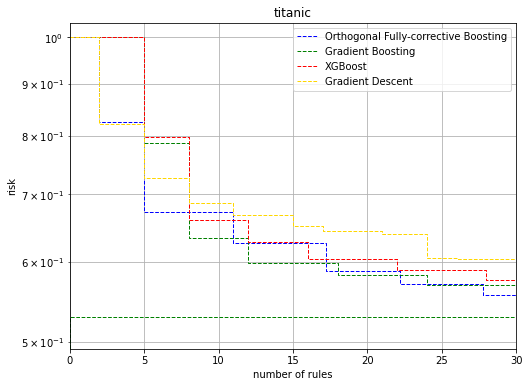

1
0:00:13.607540

0:00:13.341784

0:00:11.989678

0:00:15.307716

0:00:15.688766

orth_fc_Newton-CG: avg train risk: 0.5057697518459593 avg test risk 0.5729827615356953 &s: 24.22
0:00:10.207016

0:00:09.748049

0:00:09.981797

0:00:10.985359

0:00:10.786962

gpe_boosting_: avg train risk: 0.5397645161218193 avg test risk 0.5833655812165542 &s: 25.78
0:00:06.378232

0:00:05.096262

0:00:06.103155

0:00:06.268679

0:00:06.628422

xgb_keep_: avg train risk: 0.5719622683755764 avg test risk 0.6153504349639183 &s: 23.759999999999998
0:00:03.867285

0:00:04.003978

0:00:04.026776

0:00:04.018622

0:00:03.936773

mwg_boosting_: avg train risk: 0.8025141146166128 avg test risk 0.8505754186780787 &s: 13.580000000000002
orth_fc_Newton-CG auc: 19.072381725124977
[2.0, 6.0, 11.0, 16.4, 23.2, 29.2, 37.2, 44.4, 50.4, 22.4] [0.8612646072238814, 0.7671661339520511, 0.6965224249443501, 0.6263107634577356, 0.5622461472592611, 0.47839935403267403, 0.4070427815376959, 0.3292956021462877, 0.261162898226921

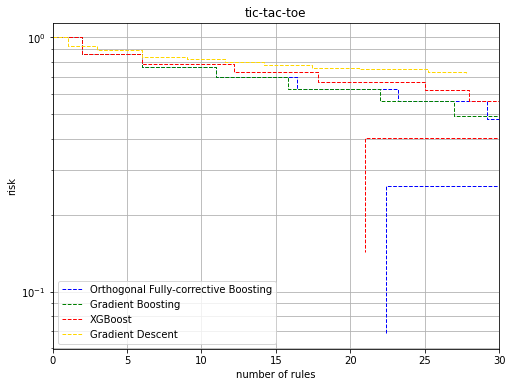

1.0
0:00:02.250264

0:00:02.718703

0:00:02.517371

0:00:02.373748

0:00:02.574422

orth_fc_Newton-CG: avg train risk: 0.21451796837097215 avg test risk 0.5057540579430352 &s: 21.419999999999998
0:00:00.998036

0:00:01.126896

0:00:01.294966

0:00:00.942679

0:00:01.132417

gpe_boosting_: avg train risk: 0.19805794967876345 avg test risk 0.40221466361195224 &s: 23.14
0:00:01.032876

0:00:01.574306

0:00:01.792392

0:00:01.408142

0:00:01.458193

xgb_keep_: avg train risk: 0.27825730776762836 avg test risk 0.3884195725916297 &s: 19.6
0:00:00.739802

0:00:00.767084

0:00:00.622427

0:00:00.958816

0:00:00.785630

mwg_boosting_: avg train risk: 0.2903016493274525 avg test risk 0.41164950224126295 &s: 16.259999999999998
orth_fc_Newton-CG auc: 9.519662512279295
[2.0, 5.6, 8.8, 13.2, 18.6, 24.4, 29.0, 33.2, 37.6, 41.8] [0.7723560421183912, 0.40235082498875235, 0.26732935907868216, 0.18049923874736187, 0.12832374598785434, 0.10151132498601978, 0.08948322984187576, 0.07659226373731193, 0.06684

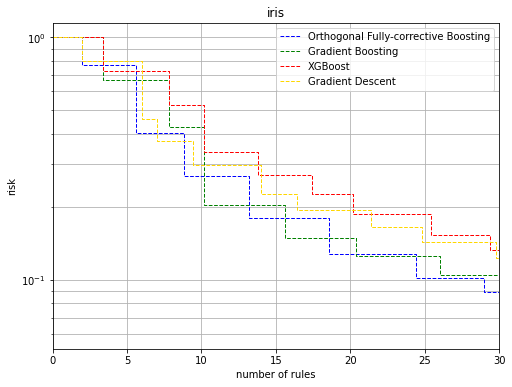

1.0
0:03:59.243024

orth fc Newton-CG does not exist: 
../experiment_output_20230517exhaustive/breast_cancer/breast_cancer_orth_fc_Newton-CG_realkd_col_5_rep1.txt
orth fc Newton-CG does not exist: 
../experiment_output_20230517exhaustive/breast_cancer/breast_cancer_orth_fc_Newton-CG_realkd_col_5_rep2.txt
orth fc Newton-CG does not exist: 
../experiment_output_20230517exhaustive/breast_cancer/breast_cancer_orth_fc_Newton-CG_realkd_col_5_rep3.txt
orth fc Newton-CG does not exist: 
../experiment_output_20230517exhaustive/breast_cancer/breast_cancer_orth_fc_Newton-CG_realkd_col_5_rep4.txt
orth_fc_Newton-CG: avg train risk: 0.19706592182561106 avg test risk 0.25355040377072535 &s: 20.2
0:01:08.442983

0:00:50.297590

0:01:40.914312

0:01:04.846667

0:01:27.642299

gpe_boosting_: avg train risk: 0.20873953481414903 avg test risk 0.24480261616095125 &s: 22.22
0:01:55.097351

0:00:45.401641

0:01:35.257614

0:01:14.282319

0:00:44.103646

xgb_keep_: avg train risk: 0.27953978625131054 avg test

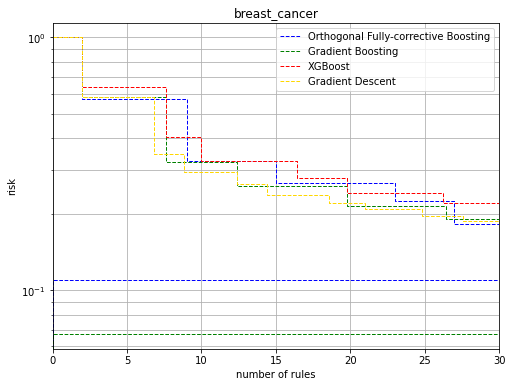

1.0
0:00:35.592707

0:00:16.183097

0:00:10.656385

0:00:16.086808

0:03:17.397956

orth_fc_Newton-CG: avg train risk: 0.13541392059940455 avg test risk 0.3173398638200499 &s: 23.32
0:00:07.010609

0:00:04.118609

0:00:04.994549

0:00:02.676844

0:00:03.357837

gpe_boosting_: avg train risk: 0.146399516220532 avg test risk 0.36321000598923175 &s: 25.0
0:00:02.203224

0:00:01.702070

0:00:02.075618

0:00:02.339080

0:00:02.451813

xgb_keep_: avg train risk: 0.20154443867078758 avg test risk 0.3337093362915561 &s: 21.0
0:00:01.649945

0:00:01.501567

0:00:01.484689

0:00:01.568626

0:00:01.443735

mwg_boosting_: avg train risk: 0.20337040637959808 avg test risk 0.3231462239949459 &s: 16.14
orth_fc_Newton-CG auc: 7.221632709772086
[2.0, 5.8, 10.2, 15.6, 21.2, 25.8, 30.8, 35.4, 40.0, 46.4] [0.6742932705032747, 0.23363153115241939, 0.13240030334884678, 0.08240046062743282, 0.05849914394888082, 0.04424744405398752, 0.036439046699163924, 0.03505416057815764, 0.03012211893192605, 0.02705172614

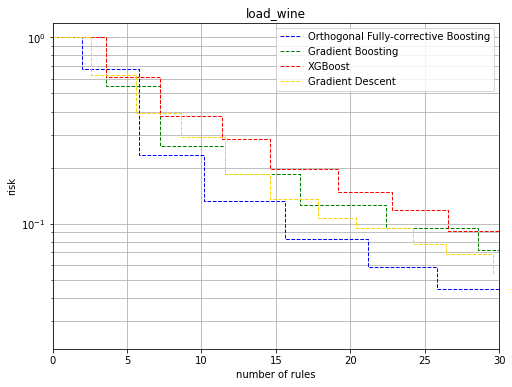

1.0
0:00:11.965406

0:00:12.548423

0:00:11.690416

0:00:12.336110

0:00:11.623950

orth_fc_Newton-CG: avg train risk: 0.568148776643181 avg test risk 0.5988205634685649 &s: 13.88
0:00:11.375845

0:00:11.093271

0:00:11.419780

0:00:10.751418

0:00:10.329962

gpe_boosting_: avg train risk: 0.575117228231503 avg test risk 0.6080666844117469 &s: 13.419999999999998
0:00:12.901663

0:00:12.810637

0:00:12.812205

0:00:13.136089

0:00:12.961299

xgb_keep_: avg train risk: 0.5884136363114145 avg test risk 0.6280634224287353 &s: 12.8
0:00:16.993144

0:00:15.142591

0:00:15.652115

0:00:17.990134

0:00:20.397952

mwg_boosting_: avg train risk: 0.5871492884950891 avg test risk 0.6059385983152414 &s: 8.92
orth_fc_Newton-CG auc: 6.3581275209094
[1.0, 3.0, 5.4, 9.0, 11.6, 15.0, 18.8, 21.8, 24.6, 28.6] [0.6324112983795195, 0.597392455495398, 0.5800204781757289, 0.5714893095287816, 0.5636768347940783, 0.558070109307546, 0.5522276475769955, 0.5465623983497088, 0.5415058510950218, 0.5381313837290307]


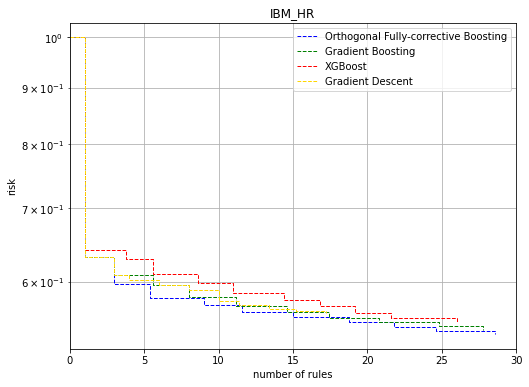

1.0
orth fc Newton-CG does not exist: 
../experiment_output_20230517exhaustive/telco_churn/telco_churn_orth_fc_Newton-CG_realkd_col_4_rep1.txt
orth fc Newton-CG does not exist: 
../experiment_output_20230517exhaustive/telco_churn/telco_churn_orth_fc_Newton-CG_realkd_col_4_rep2.txt
orth fc Newton-CG does not exist: 
../experiment_output_20230517exhaustive/telco_churn/telco_churn_orth_fc_Newton-CG_realkd_col_4_rep3.txt
orth fc Newton-CG does not exist: 
../experiment_output_20230517exhaustive/telco_churn/telco_churn_orth_fc_Newton-CG_realkd_col_4_rep4.txt
orth_fc_Newton-CG: avg train risk: 0.0 avg test risk 0.0 &s: 0.0
0:31:23.160788

gpe boosting  does not exist: 
../experiment_output_20230517exhaustive/telco_churn/telco_churn_gpe_boosting__realkd_col_4_rep1.txt
gpe boosting  does not exist: 
../experiment_output_20230517exhaustive/telco_churn/telco_churn_gpe_boosting__realkd_col_4_rep2.txt
gpe boosting  does not exist: 
../experiment_output_20230517exhaustive/telco_churn/telco_churn_gp

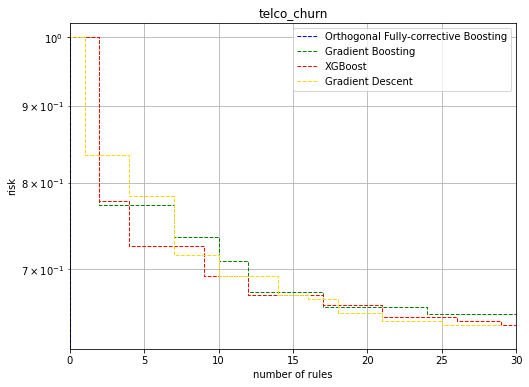

1.0
0:00:32.946585

orth fc Newton-CG does not exist: 
../experiment_output_20230517exhaustive/GenderRecognition/GenderRecognition_orth_fc_Newton-CG_realkd_col_3_rep1.txt
orth fc Newton-CG does not exist: 
../experiment_output_20230517exhaustive/GenderRecognition/GenderRecognition_orth_fc_Newton-CG_realkd_col_3_rep2.txt
orth fc Newton-CG does not exist: 
../experiment_output_20230517exhaustive/GenderRecognition/GenderRecognition_orth_fc_Newton-CG_realkd_col_3_rep3.txt
orth fc Newton-CG does not exist: 
../experiment_output_20230517exhaustive/GenderRecognition/GenderRecognition_orth_fc_Newton-CG_realkd_col_3_rep4.txt
orth_fc_Newton-CG: avg train risk: 0.9968626792532731 avg test risk 0.9985547179633809 &s: 11.0
0:00:25.492736

gpe boosting  does not exist: 
../experiment_output_20230517exhaustive/GenderRecognition/GenderRecognition_gpe_boosting__realkd_col_3_rep1.txt
gpe boosting  does not exist: 
../experiment_output_20230517exhaustive/GenderRecognition/GenderRecognition_gpe_boosting__

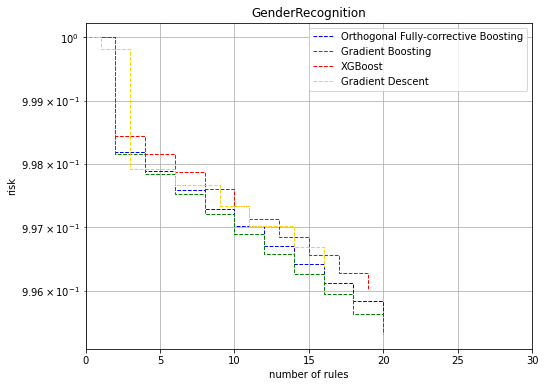

1.0
0:00:08.517368

0:00:08.248984

0:00:07.916403

0:00:08.922585

0:00:08.616615

orth_fc_Newton-CG: avg train risk: 0.2217228549341578 avg test risk 0.23742681559231377 &s: 23.0
0:00:05.648307

gpe boosting  does not exist: 
../experiment_output_20230517exhaustive/banknote/banknote_gpe_boosting__realkd_col_10_rep1.txt
gpe boosting  does not exist: 
../experiment_output_20230517exhaustive/banknote/banknote_gpe_boosting__realkd_col_10_rep2.txt
gpe boosting  does not exist: 
../experiment_output_20230517exhaustive/banknote/banknote_gpe_boosting__realkd_col_10_rep3.txt
gpe boosting  does not exist: 
../experiment_output_20230517exhaustive/banknote/banknote_gpe_boosting__realkd_col_10_rep4.txt
gpe_boosting_: avg train risk: 0.248222813414933 avg test risk 0.25703594469296176 &s: 22.8
0:00:07.043982

0:00:06.480959

0:00:07.160596

0:00:07.144050

0:00:07.468670

xgb_keep_: avg train risk: 0.3093574951891346 avg test risk 0.3184472486166464 &s: 18.28
0:00:06.298169

mwg boosting  does not

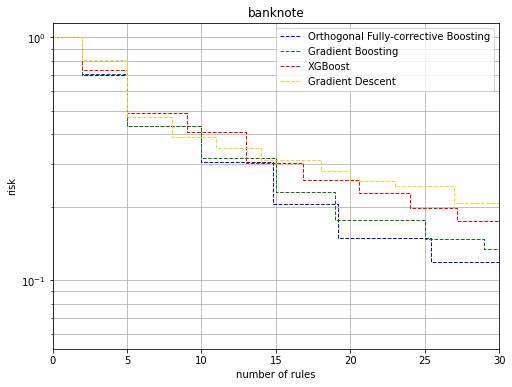

1.0
0:03:21.616999

0:03:06.255846

orth fc Newton-CG does not exist: 
../experiment_output_20230517exhaustive/liver/liver_orth_fc_Newton-CG_realkd_col_10_rep2.txt
orth fc Newton-CG does not exist: 
../experiment_output_20230517exhaustive/liver/liver_orth_fc_Newton-CG_realkd_col_10_rep3.txt
orth fc Newton-CG does not exist: 
../experiment_output_20230517exhaustive/liver/liver_orth_fc_Newton-CG_realkd_col_10_rep4.txt
orth_fc_Newton-CG: avg train risk: 0.6150970525000787 avg test risk 0.8982034320309962 &s: 23.95
0:01:37.277565

0:01:42.170216

gpe boosting  does not exist: 
../experiment_output_20230517exhaustive/liver/liver_gpe_boosting__realkd_col_10_rep2.txt
gpe boosting  does not exist: 
../experiment_output_20230517exhaustive/liver/liver_gpe_boosting__realkd_col_10_rep3.txt
gpe boosting  does not exist: 
../experiment_output_20230517exhaustive/liver/liver_gpe_boosting__realkd_col_10_rep4.txt
gpe_boosting_: avg train risk: 0.6466344224122936 avg test risk 0.8851047998437365 &s: 24.8

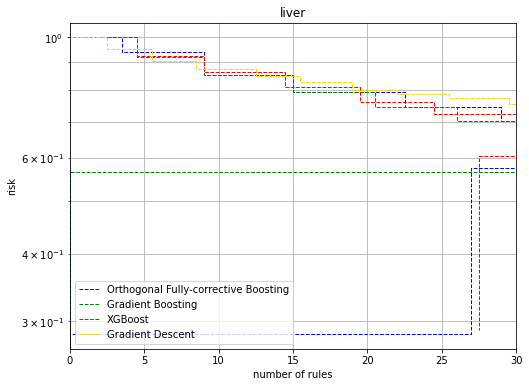

1.0
0:05:52.232912

orth fc Newton-CG does not exist: 
../experiment_output_20230517exhaustive/magic/magic_orth_fc_Newton-CG_realkd_col_5_rep1.txt
orth fc Newton-CG does not exist: 
../experiment_output_20230517exhaustive/magic/magic_orth_fc_Newton-CG_realkd_col_5_rep2.txt
orth fc Newton-CG does not exist: 
../experiment_output_20230517exhaustive/magic/magic_orth_fc_Newton-CG_realkd_col_5_rep3.txt
orth fc Newton-CG does not exist: 
../experiment_output_20230517exhaustive/magic/magic_orth_fc_Newton-CG_realkd_col_5_rep4.txt
orth_fc_Newton-CG: avg train risk: 0.7014541191007304 avg test risk 0.6808827433482383 &s: 20.9
0:01:29.180872

gpe boosting  does not exist: 
../experiment_output_20230517exhaustive/magic/magic_gpe_boosting__realkd_col_5_rep1.txt
gpe boosting  does not exist: 
../experiment_output_20230517exhaustive/magic/magic_gpe_boosting__realkd_col_5_rep2.txt
gpe boosting  does not exist: 
../experiment_output_20230517exhaustive/magic/magic_gpe_boosting__realkd_col_5_rep3.txt
gpe

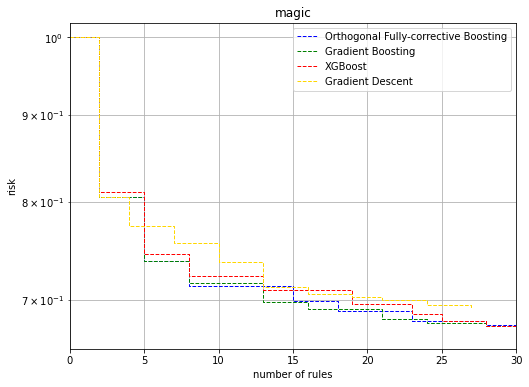

1.0
0:12:08.342159

orth fc Newton-CG does not exist: 
../experiment_output_20230517exhaustive/adult/adult_orth_fc_Newton-CG_realkd_col_5_rep1.txt
orth fc Newton-CG does not exist: 
../experiment_output_20230517exhaustive/adult/adult_orth_fc_Newton-CG_realkd_col_5_rep2.txt
orth fc Newton-CG does not exist: 
../experiment_output_20230517exhaustive/adult/adult_orth_fc_Newton-CG_realkd_col_5_rep3.txt
orth fc Newton-CG does not exist: 
../experiment_output_20230517exhaustive/adult/adult_orth_fc_Newton-CG_realkd_col_5_rep4.txt
orth_fc_Newton-CG: avg train risk: 0.5737933454479119 avg test risk 0.5871183516762606 &s: 17.8
0:02:16.694250

gpe boosting  does not exist: 
../experiment_output_20230517exhaustive/adult/adult_gpe_boosting__realkd_col_5_rep1.txt
gpe boosting  does not exist: 
../experiment_output_20230517exhaustive/adult/adult_gpe_boosting__realkd_col_5_rep2.txt
gpe boosting  does not exist: 
../experiment_output_20230517exhaustive/adult/adult_gpe_boosting__realkd_col_5_rep3.txt
gpe

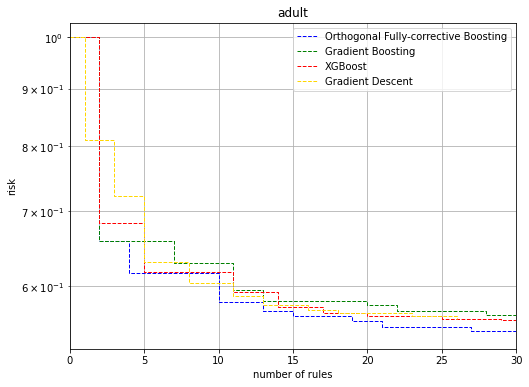

1.0
0:01:37.372907

orth fc Newton-CG does not exist: 
../experiment_output_20230517exhaustive/digits5/digits5_orth_fc_Newton-CG_realkd_col_3_rep1.txt
orth fc Newton-CG does not exist: 
../experiment_output_20230517exhaustive/digits5/digits5_orth_fc_Newton-CG_realkd_col_3_rep2.txt
orth fc Newton-CG does not exist: 
../experiment_output_20230517exhaustive/digits5/digits5_orth_fc_Newton-CG_realkd_col_3_rep3.txt
orth fc Newton-CG does not exist: 
../experiment_output_20230517exhaustive/digits5/digits5_orth_fc_Newton-CG_realkd_col_3_rep4.txt
orth_fc_Newton-CG: avg train risk: 0.36621204523537015 avg test risk 0.35506479821687215 &s: 15.8
0:01:12.743279

gpe boosting  does not exist: 
../experiment_output_20230517exhaustive/digits5/digits5_gpe_boosting__realkd_col_3_rep1.txt
gpe boosting  does not exist: 
../experiment_output_20230517exhaustive/digits5/digits5_gpe_boosting__realkd_col_3_rep2.txt
gpe boosting  does not exist: 
../experiment_output_20230517exhaustive/digits5/digits5_gpe_boost

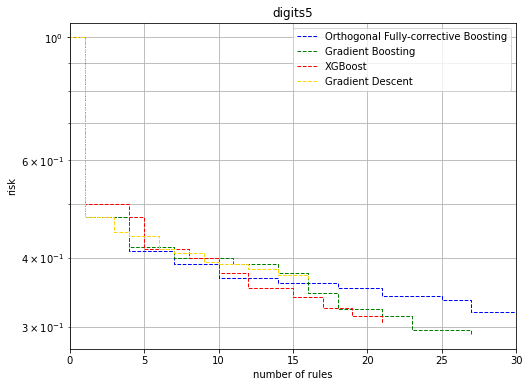

322646873.58870494
0:00:39.209587

0:00:39.128289

0:00:38.340024

0:00:37.957410

0:00:43.015251

orth_fc_Newton-CG: avg train risk: 0.11437779615854264 avg test risk 0.11166033702974336 &s: 16.44
0:00:15.296815

0:00:18.888633

0:00:18.982561

0:00:14.891558

0:00:11.640543

gpe_boosting_: avg train risk: 0.125251043299104 avg test risk 0.1175901168719039 &s: 19.72
0:00:14.465815

0:00:15.121827

0:00:11.403291

0:00:12.703310

0:00:11.186348

xgb_keep_: avg train risk: 0.1252510448694853 avg test risk 0.11759012007350571 &s: 19.72
0:00:07.249875

0:00:06.924461

0:00:08.344774

0:00:07.678833

0:00:07.336513

mwg_boosting_: avg train risk: 0.18325283196411737 avg test risk 0.16979881308874178 &s: 11.34
orth_fc_Newton-CG auc: 4.980201996428164
[2.0, 4.0, 7.0, 8.6, 10.4, 13.6, 20.8, 25.8, 33.0, 39.2] [0.35013207679530217, 0.16442532141363891, 0.11188534808971318, 0.0895007360081351, 0.08007206289388955, 0.07510212861975876, 0.07184755760506648, 0.06912863845009902, 0.06682477051742534

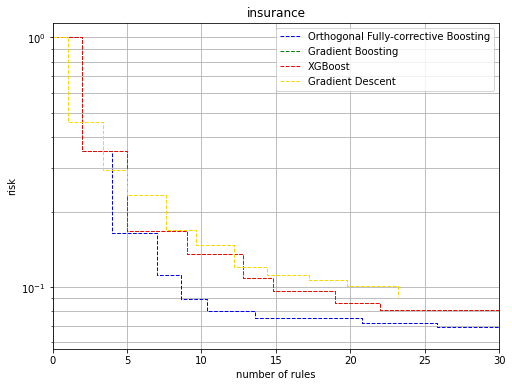

226.89125115757616
0:00:07.457114

0:00:06.586744

0:00:07.048371

0:00:06.205782

0:00:07.275212

orth_fc_Newton-CG: avg train risk: 0.04895617327364218 avg test risk 0.05727842582404182 &s: 23.52
0:00:04.867923

0:00:04.050076

0:00:03.706563

0:00:03.753592

0:00:05.132103

gpe_boosting_: avg train risk: 0.050057416725434886 avg test risk 0.05842314531962254 &s: 23.68
0:00:03.443214

0:00:03.110763

0:00:02.719824

0:00:02.997587

0:00:03.582533

xgb_keep_: avg train risk: 0.050057418136038014 avg test risk 0.0584231480028503 &s: 23.68
0:00:02.116320

0:00:02.387820

0:00:02.507777

0:00:02.626818

0:00:02.930714

mwg_boosting_: avg train risk: 0.05351844849990878 avg test risk 0.05531143602943779 &s: 11.72
orth_fc_Newton-CG auc: 4.794711835064397
[3.4, 6.6, 9.8, 13.4, 18.0, 23.6, 30.0, 36.8, 43.6, 50.0] [0.08227333938524446, 0.06249555845124567, 0.053192330844143466, 0.04739357493401795, 0.044510676248360935, 0.042607615509595034, 0.04118948853294028, 0.039882671728801014, 0.038614

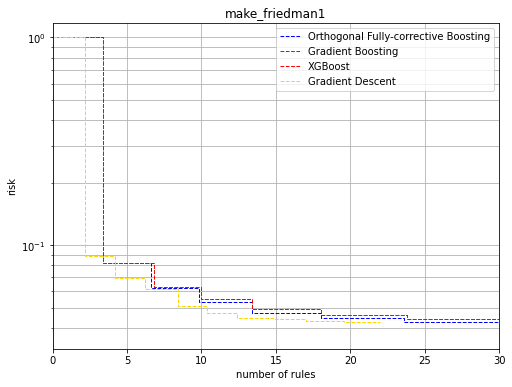

379683.4049960418
0:00:23.869710

0:00:29.386756

0:00:29.370761

0:00:28.610347

0:00:30.841823

orth_fc_Newton-CG: avg train risk: 0.056450595204174336 avg test risk 0.05669089493597592 &s: 17.259999999999998
0:00:17.894792

0:00:15.466859

0:00:19.224580

0:00:19.499551

0:00:15.729430

gpe_boosting_: avg train risk: 0.06600685907233031 avg test risk 0.06645684802680402 &s: 17.86
0:00:13.636610

0:00:12.126070

0:00:15.089401

0:00:13.296886

0:00:11.754926

xgb_keep_: avg train risk: 0.06600685867401894 avg test risk 0.0664568465559786 &s: 17.86
0:00:10.601954

0:00:12.295169

0:00:12.107281

0:00:11.486051

0:00:12.434673

mwg_boosting_: avg train risk: 0.0811355469436019 avg test risk 0.08449720686447891 &s: 14.48
orth_fc_Newton-CG auc: 4.558309086487656
[3.0, 5.4, 8.4, 11.6, 14.6, 17.6, 21.6, 26.0, 30.6, 33.8] [0.1932950643233557, 0.10927073958656544, 0.07430641167389414, 0.044556198879617606, 0.03486158509596764, 0.02701584195089422, 0.022746165460563402, 0.02060208705965821, 0

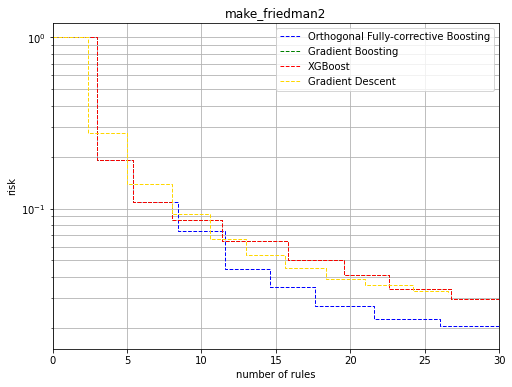

1.8780821278399789
0:00:20.952363

0:00:15.615899

0:00:19.656056

0:00:15.657240

0:00:16.391121

orth_fc_Newton-CG: avg train risk: 0.020602322394808116 avg test risk 0.02404176623957199 &s: 21.84
0:00:11.414043

0:00:10.518643

0:00:11.096415

0:00:10.469230

0:00:09.548979

gpe_boosting_: avg train risk: 0.02105423929235786 avg test risk 0.024681383760312342 &s: 23.68
0:00:09.029474

0:00:07.786897

0:00:08.989193

0:00:09.092719

0:00:07.897996

xgb_keep_: avg train risk: 0.02105423875897535 avg test risk 0.02468138268323538 &s: 23.68
0:00:06.794994

0:00:07.146962

0:00:05.870403

0:00:06.059582

0:00:05.344176

mwg_boosting_: avg train risk: 0.02781300992681015 avg test risk 0.030091530383938518 &s: 16.02
orth_fc_Newton-CG auc: 4.583639152502944
[4.0, 7.6, 11.0, 14.6, 19.0, 23.4, 27.4, 31.8, 36.4, 43.2] [0.03381021541861172, 0.027015571019386196, 0.022614378641743045, 0.020225083084201026, 0.018919175206552338, 0.01794397130023874, 0.017171942592109208, 0.016587485153117334, 0.0

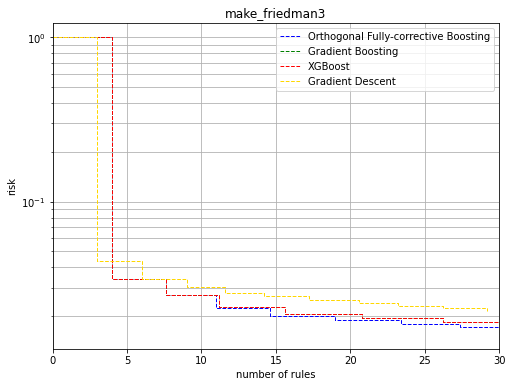

2029057842.6515312
0:00:26.660052

0:00:27.131175

0:00:22.490915

0:00:21.929967

0:00:27.724134

orth_fc_Newton-CG: avg train risk: 0.3298988685304777 avg test risk 0.383180948089542 &s: 22.419999999999998
0:00:13.316932

0:00:12.736439

0:00:12.829765

0:00:10.837132

0:00:10.878036

gpe_boosting_: avg train risk: 0.339938348273477 avg test risk 0.38007905751338356 &s: 23.68
0:00:10.910033

0:00:14.171845

0:00:14.306873

0:00:13.476303

0:00:12.976557

xgb_keep_: avg train risk: 0.33993834911657417 avg test risk 0.3800790436380486 &s: 23.68
0:00:05.202573

0:00:05.495236

0:00:06.009586

0:00:05.767066

0:00:05.552754

mwg_boosting_: avg train risk: 0.3741585039939354 avg test risk 0.3761423186887246 &s: 14.419999999999998
orth_fc_Newton-CG auc: 11.434485665625825
[1.0, 6.4, 10.2, 14.2, 20.2, 24.4, 28.6, 34.4, 39.8, 45.0] [0.4842848835817179, 0.3877712256982776, 0.3506753724350897, 0.3275594152438476, 0.31193375389009814, 0.299923378809987, 0.29139907006235155, 0.2859313403565124, 

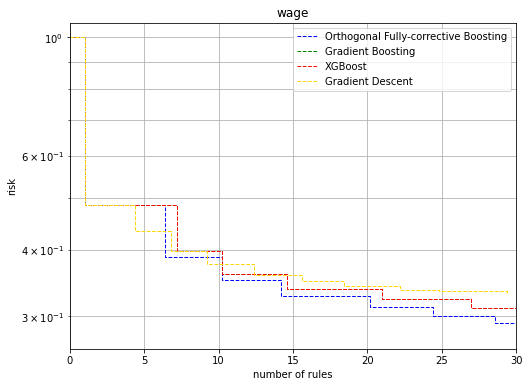

31.64835409252669
0:01:15.857270

0:01:15.437496

0:01:07.571041

0:01:12.970228

0:01:10.244385

orth_fc_Newton-CG: avg train risk: 0.20065370474589533 avg test risk 0.20401188527560069 &s: 12.7
0:00:32.882468

0:00:29.396215

0:00:28.901101

0:00:26.997810

0:00:28.827473

gpe_boosting_: avg train risk: 0.20246693348496655 avg test risk 0.20586809318159704 &s: 12.440000000000001
0:00:33.937274

0:00:31.477300

0:00:32.200455

0:00:29.991642

0:00:37.575222

xgb_keep_: avg train risk: 0.20246693196627588 avg test risk 0.2058680888867706 &s: 12.440000000000001
0:00:37.456043

0:00:34.004081

0:00:36.671079

0:00:37.822107

0:00:38.066280

mwg_boosting_: avg train risk: 0.20624130582353736 avg test risk 0.20870598795254663 &s: 8.24
orth_fc_Newton-CG auc: 6.295602033077414
[1.0, 3.0, 5.0, 7.0, 10.8, 13.4, 16.4, 19.4, 23.4, 27.6] [0.2424067272009615, 0.20866226506646207, 0.19994798507212633, 0.19721781193538773, 0.195115639479818, 0.19380858788210412, 0.19287043961214886, 0.19243829425562

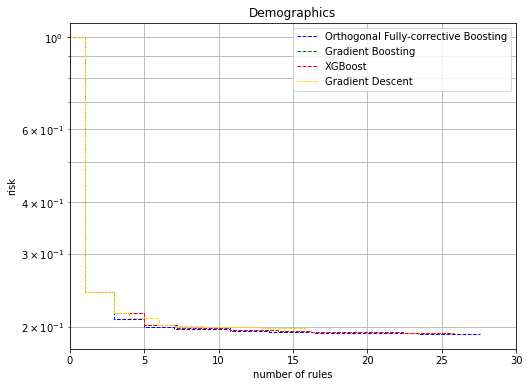

43.986571428571416
0:00:00.488196

orth fc Newton-CG does not exist: 
../experiment_output_20230517exhaustive/gdp/gdp_orth_fc_Newton-CG_realkd_col_20_rep1.txt
orth fc Newton-CG does not exist: 
../experiment_output_20230517exhaustive/gdp/gdp_orth_fc_Newton-CG_realkd_col_20_rep2.txt
orth fc Newton-CG does not exist: 
../experiment_output_20230517exhaustive/gdp/gdp_orth_fc_Newton-CG_realkd_col_20_rep3.txt
orth fc Newton-CG does not exist: 
../experiment_output_20230517exhaustive/gdp/gdp_orth_fc_Newton-CG_realkd_col_20_rep4.txt
orth_fc_Newton-CG: avg train risk: 0.004942290779810996 avg test risk 0.00680407049547238 &s: 11.7
0:00:00.350804

gpe boosting  does not exist: 
../experiment_output_20230517exhaustive/gdp/gdp_gpe_boosting__realkd_col_20_rep1.txt
gpe boosting  does not exist: 
../experiment_output_20230517exhaustive/gdp/gdp_gpe_boosting__realkd_col_20_rep2.txt
gpe boosting  does not exist: 
../experiment_output_20230517exhaustive/gdp/gdp_gpe_boosting__realkd_col_20_rep3.txt
gpe bo

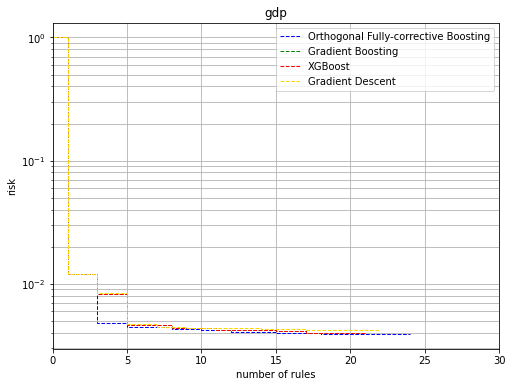

194464336.77843493
0:00:20.229785

0:00:20.709073

0:00:17.720397

0:00:20.361605

0:00:22.305047

orth_fc_Newton-CG: avg train risk: 0.09842655945431904 avg test risk 0.10560399213384805 &s: 16.84
0:00:12.098506

gpe boosting  does not exist: 
../experiment_output_20230517exhaustive/used_cars/used_cars_gpe_boosting__realkd_col_10_rep1.txt
gpe boosting  does not exist: 
../experiment_output_20230517exhaustive/used_cars/used_cars_gpe_boosting__realkd_col_10_rep2.txt
gpe boosting  does not exist: 
../experiment_output_20230517exhaustive/used_cars/used_cars_gpe_boosting__realkd_col_10_rep3.txt
gpe boosting  does not exist: 
../experiment_output_20230517exhaustive/used_cars/used_cars_gpe_boosting__realkd_col_10_rep4.txt
gpe_boosting_: avg train risk: 0.12944063272846168 avg test risk 0.1307125821698154 &s: 21.9
0:00:08.188307

0:00:09.637001

0:00:08.860564

0:00:09.846258

0:00:10.888137

xgb_keep_: avg train risk: 0.12023073309485448 avg test risk 0.13144792092172825 &s: 19.78
0:00:08.37

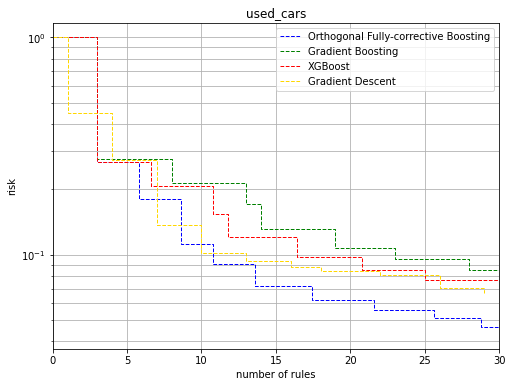

29074.481900452487
0:00:07.590614

orth fc Newton-CG does not exist: 
../experiment_output_20230517exhaustive/load_diabetes/load_diabetes_orth_fc_Newton-CG_realkd_col_5_rep1.txt
orth fc Newton-CG does not exist: 
../experiment_output_20230517exhaustive/load_diabetes/load_diabetes_orth_fc_Newton-CG_realkd_col_5_rep2.txt
orth fc Newton-CG does not exist: 
../experiment_output_20230517exhaustive/load_diabetes/load_diabetes_orth_fc_Newton-CG_realkd_col_5_rep3.txt
orth fc Newton-CG does not exist: 
../experiment_output_20230517exhaustive/load_diabetes/load_diabetes_orth_fc_Newton-CG_realkd_col_5_rep4.txt
orth_fc_Newton-CG: avg train risk: 0.1034592720277198 avg test risk 0.11848698171411849 &s: 23.4
0:00:03.113515

0:00:03.341900

0:00:03.607384

0:00:04.032909

0:00:03.775819

gpe_boosting_: avg train risk: 0.10912915350175072 avg test risk 0.1312698847048937 &s: 25.5
0:00:03.475137

0:00:03.688152

0:00:03.957536

0:00:04.212230

0:00:04.265215

xgb_keep_: avg train risk: 0.10912915466995

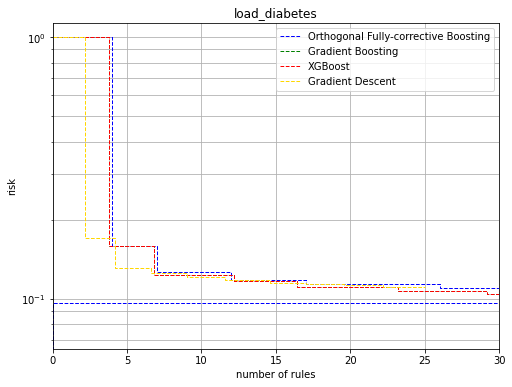

592.1469169960473
0:00:08.995957

0:00:08.125308

0:00:10.464442

0:00:12.706516

0:00:11.911839

orth_fc_Newton-CG: avg train risk: 0.06657969688155173 avg test risk 0.06423625013527448 &s: 21.119999999999997
0:00:05.978742

0:00:06.207093

0:00:07.500466

0:00:06.690013

0:00:07.280871

gpe_boosting_: avg train risk: 0.07190101209592796 avg test risk 0.06947908596214722 &s: 20.78
0:00:05.286625

0:00:05.123024

0:00:05.578089

0:00:05.108298

0:00:05.330171

xgb_keep_: avg train risk: 0.07190101520641501 avg test risk 0.06947908713948206 &s: 20.78
0:00:02.930463

0:00:02.918666

0:00:03.023439

0:00:03.521953

0:00:02.878502

mwg_boosting_: avg train risk: 0.08425138997844031 avg test risk 0.06773754516576595 &s: 11.4
orth_fc_Newton-CG auc: 3.099966437510434
[1.0, 4.2, 9.2, 13.2, 18.6, 23.0, 28.2, 33.4, 37.4, 43.0] [0.1490775557495277, 0.08186512622455275, 0.06914911437900617, 0.059998994409171016, 0.0553754720272715, 0.053235049934575576, 0.05140403560213639, 0.04992082620216377, 0.

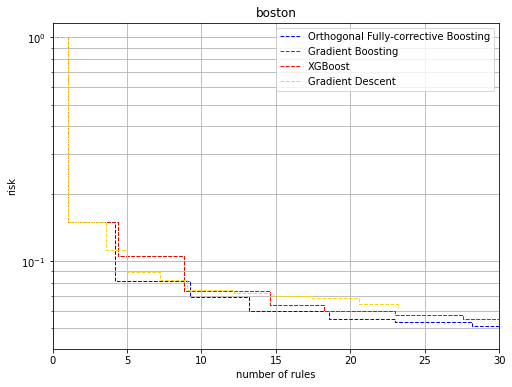

30.46778212179487
0:00:24.881379

0:00:30.255899

0:00:22.896675

0:00:27.129008

0:00:26.962301

orth_fc_Newton-CG: avg train risk: 0.011057831918447785 avg test risk 0.01778085160276076 &s: 22.34
0:00:08.797532

0:00:11.753591

0:00:09.768146

0:00:11.888617

0:00:14.646109

gpe_boosting_: avg train risk: 0.0126474076589238 avg test risk 0.019082029113571868 &s: 23.8
0:00:08.984750

0:00:10.504340

0:00:10.040439

0:00:11.850219

0:00:15.190102

xgb_keep_: avg train risk: 0.012647405182072894 avg test risk 0.019082031198412966 &s: 23.8
0:00:01.114777

0:00:01.140020

0:00:01.270637

0:00:01.202446

0:00:01.072827

mwg_boosting_: avg train risk: 0.015452173129153406 avg test risk 0.016526862111264425 &s: 12.48
orth_fc_Newton-CG auc: 1.396666533789995
[1.0, 5.0, 9.0, 11.8, 16.4, 23.2, 29.4, 36.2, 42.8, 48.6] [0.04058419814681026, 0.017012643767383432, 0.011729350593823068, 0.008660440439554868, 0.007384566056514839, 0.006453135016763312, 0.005624120267216372, 0.004929528337765171, 0.00

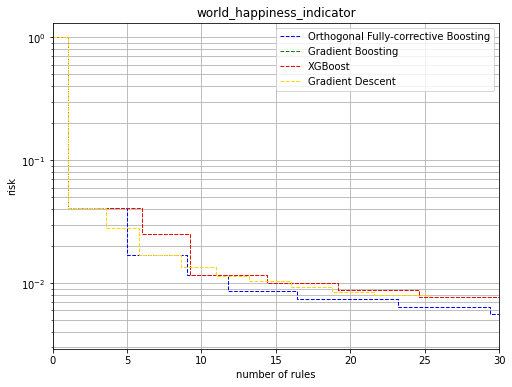

4882.764241803283
0:02:11.172154

orth fc Newton-CG does not exist: 
../experiment_output_20230517exhaustive/who_life_expectancy/who_life_expectancy_orth_fc_Newton-CG_realkd_col_5_rep1.txt
orth fc Newton-CG does not exist: 
../experiment_output_20230517exhaustive/who_life_expectancy/who_life_expectancy_orth_fc_Newton-CG_realkd_col_5_rep2.txt
orth fc Newton-CG does not exist: 
../experiment_output_20230517exhaustive/who_life_expectancy/who_life_expectancy_orth_fc_Newton-CG_realkd_col_5_rep3.txt
orth fc Newton-CG does not exist: 
../experiment_output_20230517exhaustive/who_life_expectancy/who_life_expectancy_orth_fc_Newton-CG_realkd_col_5_rep4.txt
orth_fc_Newton-CG: avg train risk: 0.005669601194790547 avg test risk 0.00681689768923372 &s: 26.3
0:00:58.425951

gpe boosting  does not exist: 
../experiment_output_20230517exhaustive/who_life_expectancy/who_life_expectancy_gpe_boosting__realkd_col_5_rep1.txt
gpe boosting  does not exist: 
../experiment_output_20230517exhaustive/who_life_expe

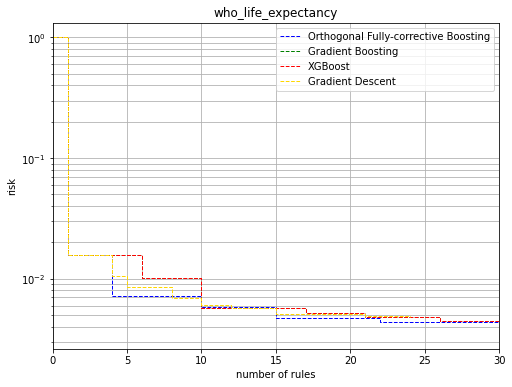

3.5
0:13:35.400086

orth fc Newton-CG does not exist: 
../experiment_output_20230517exhaustive/mobile_prices/mobile_prices_orth_fc_Newton-CG_realkd_col_4_rep1.txt
orth fc Newton-CG does not exist: 
../experiment_output_20230517exhaustive/mobile_prices/mobile_prices_orth_fc_Newton-CG_realkd_col_4_rep2.txt
orth fc Newton-CG does not exist: 
../experiment_output_20230517exhaustive/mobile_prices/mobile_prices_orth_fc_Newton-CG_realkd_col_4_rep3.txt
orth fc Newton-CG does not exist: 
../experiment_output_20230517exhaustive/mobile_prices/mobile_prices_orth_fc_Newton-CG_realkd_col_4_rep4.txt
orth_fc_Newton-CG: avg train risk: 0.09483941416750229 avg test risk 0.10435677813146312 &s: 20.9
0:06:07.694306

gpe boosting  does not exist: 
../experiment_output_20230517exhaustive/mobile_prices/mobile_prices_gpe_boosting__realkd_col_4_rep1.txt
gpe boosting  does not exist: 
../experiment_output_20230517exhaustive/mobile_prices/mobile_prices_gpe_boosting__realkd_col_4_rep2.txt
gpe boosting  does not e

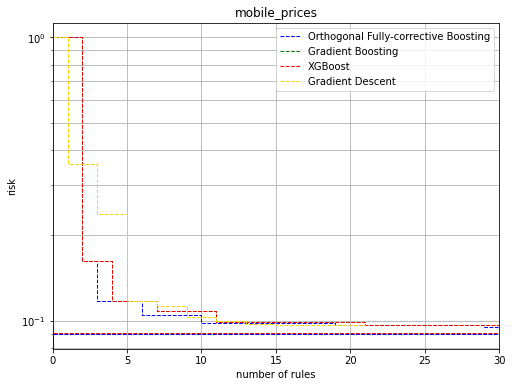

523.7783290690134
0:10:44.583742

orth fc Newton-CG does not exist: 
../experiment_output_20230517exhaustive/suicide_rates_cleaned/suicide_rates_cleaned_orth_fc_Newton-CG_realkd_col_3_rep1.txt
orth fc Newton-CG does not exist: 
../experiment_output_20230517exhaustive/suicide_rates_cleaned/suicide_rates_cleaned_orth_fc_Newton-CG_realkd_col_3_rep2.txt
orth fc Newton-CG does not exist: 
../experiment_output_20230517exhaustive/suicide_rates_cleaned/suicide_rates_cleaned_orth_fc_Newton-CG_realkd_col_3_rep3.txt
orth fc Newton-CG does not exist: 
../experiment_output_20230517exhaustive/suicide_rates_cleaned/suicide_rates_cleaned_orth_fc_Newton-CG_realkd_col_3_rep4.txt
orth_fc_Newton-CG: avg train risk: 0.5254015071424061 avg test risk 0.5046732213565823 &s: 13.2
0:01:57.068055

gpe boosting  does not exist: 
../experiment_output_20230517exhaustive/suicide_rates_cleaned/suicide_rates_cleaned_gpe_boosting__realkd_col_3_rep1.txt
gpe boosting  does not exist: 
../experiment_output_20230517exhaust

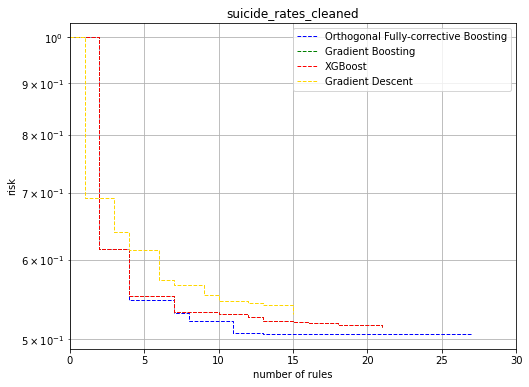

2.70680865164444
0:01:59.053280

orth fc Newton-CG does not exist: 
../experiment_output_20230517exhaustive/videogamesales/videogamesales_orth_fc_Newton-CG_realkd_col_3_rep1.txt
orth fc Newton-CG does not exist: 
../experiment_output_20230517exhaustive/videogamesales/videogamesales_orth_fc_Newton-CG_realkd_col_3_rep2.txt
orth fc Newton-CG does not exist: 
../experiment_output_20230517exhaustive/videogamesales/videogamesales_orth_fc_Newton-CG_realkd_col_3_rep3.txt
orth fc Newton-CG does not exist: 
../experiment_output_20230517exhaustive/videogamesales/videogamesales_orth_fc_Newton-CG_realkd_col_3_rep4.txt
orth_fc_Newton-CG: avg train risk: 0.9521607988965587 avg test risk 0.7139165351166771 &s: 11.2
0:00:34.383172

gpe boosting  does not exist: 
../experiment_output_20230517exhaustive/videogamesales/videogamesales_gpe_boosting__realkd_col_3_rep1.txt
gpe boosting  does not exist: 
../experiment_output_20230517exhaustive/videogamesales/videogamesales_gpe_boosting__realkd_col_3_rep2.txt
g

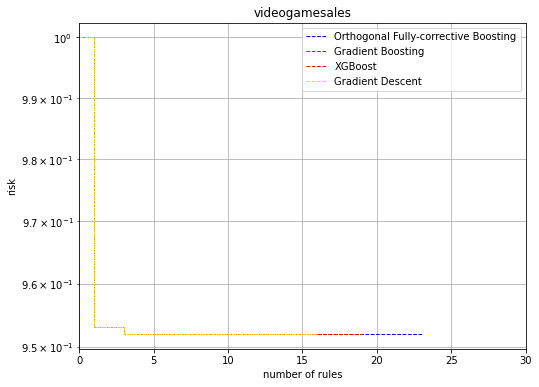

32.41651031894934
0:00:38.413007

0:00:31.416306

0:00:28.909962

0:00:34.841137

0:00:34.799852

orth_fc_Newton-CG: avg train risk: 0.014808476835963444 avg test risk 0.015467038970270495 &s: 22.380000000000003
0:00:19.881354

0:00:12.470657

0:00:15.361169

0:00:15.003470

0:00:13.863015

gpe_boosting_: avg train risk: 0.015125206326762564 avg test risk 0.016075686475168424 &s: 23.3
0:00:26.874709

0:00:20.250614

0:00:16.473826

0:00:19.103107

0:00:27.253833

xgb_keep_: avg train risk: 0.015125216536053681 avg test risk 0.016076620636321107 &s: 23.32
0:00:08.716460

0:00:10.293049

0:00:07.877688

0:00:09.110602

0:00:09.748649

mwg_boosting_: avg train risk: 0.01571605440025703 avg test risk 0.015831302669478627 &s: 10.84
orth_fc_Newton-CG auc: 1.440479291904482
[1.0, 4.0, 7.8, 11.4, 16.4, 22.4, 29.0, 37.8, 44.0, 50.0] [0.01999512234187253, 0.016124196581838154, 0.015109327842455045, 0.014585440138793912, 0.014276221859322407, 0.014009664123648319, 0.01378008256905846, 0.013577356

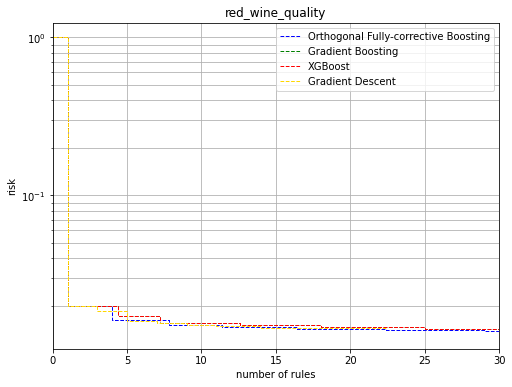

51.62076805721374
0:00:00.899161

0:00:00.838526

0:00:00.862644

0:00:00.877603

0:00:00.792501

orth_fc_Newton-CG: avg train risk: 0.10122063082559463 avg test risk 0.1093966575337153 &s: 15.419999999999998
0:00:00.621657

0:00:00.614926

0:00:00.624192

0:00:00.616313

0:00:00.524979

gpe_boosting_: avg train risk: 0.11307162110142277 avg test risk 0.10581011837941634 &s: 16.240000000000002
0:00:00.552045

0:00:00.556006

0:00:00.856204

0:00:00.682787

0:00:00.494226

xgb_keep_: avg train risk: 0.5855423774096364 avg test risk 0.6096368981659877 &s: 15.24
0:00:00.496607

0:00:00.470946

0:00:00.575405

0:00:00.554188

0:00:00.515613

mwg_boosting_: avg train risk: 0.1261498470117211 avg test risk 0.14437932836332742 &s: 13.34
orth_fc_Newton-CG auc: 5.287604515026515
[2.6, 5.6, 7.6, 10.2, 13.0, 16.8, 20.2, 23.2, 26.0, 29.0] [0.25181403475037134, 0.19409811926688034, 0.1597048633362434, 0.08277868312414081, 0.06357567308097925, 0.05896511748688996, 0.05570725950483829, 0.051554202434

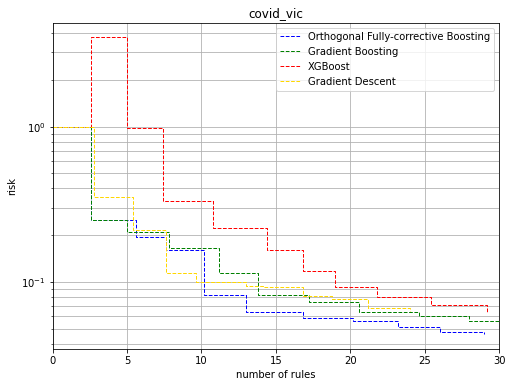

1082.8170359400497
0:00:01.254274

0:00:01.222999

0:00:01.144952

0:00:01.132546

0:00:00.961626

orth_fc_Newton-CG: avg train risk: 0.3125675087882435 avg test risk 0.43978528380867987 &s: 20.4
0:00:00.590106

0:00:00.828768

0:00:00.677469

0:00:00.668662

0:00:00.683427

gpe_boosting_: avg train risk: 0.32822986406309024 avg test risk 0.44474026153866014 &s: 20.22
0:00:00.688289

0:00:00.618356

0:00:00.776833

0:00:00.643027

0:00:00.682732

xgb_keep_: avg train risk: 3.8154824915516867 avg test risk 5.498180283084645 &s: 18.96
0:00:00.734737

0:00:00.691565

0:00:00.608062

0:00:00.685622

0:00:00.787395

mwg_boosting_: avg train risk: 0.35077326455370617 avg test risk 0.44826810771349646 &s: 14.4
orth_fc_Newton-CG auc: 12.254667499475751
[3.6, 6.6, 10.4, 14.0, 17.8, 22.2, 26.4, 30.4, 34.2, 38.4] [0.5364849337775908, 0.34175088845214335, 0.32214656094839367, 0.3000331658892551, 0.2873923581306984, 0.2832272324164258, 0.27572914452982955, 0.2673190073083435, 0.25971807777479566, 0

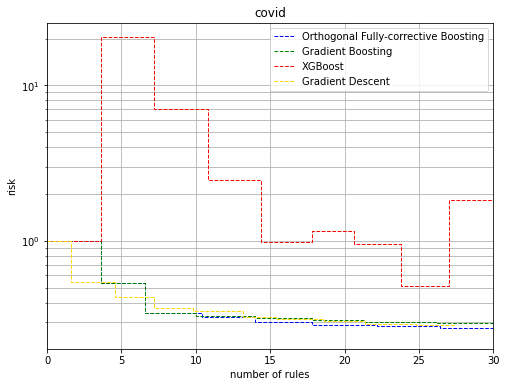

1076.416963882381
0:00:02.058693

0:00:02.369818

0:00:02.156195

0:00:02.082150

0:00:01.953477

orth_fc_Newton-CG: avg train risk: 0.24620060566596114 avg test risk 0.42087375962295737 &s: 24.36
0:00:01.080096

0:00:01.179734

0:00:01.032342

0:00:01.090469

0:00:01.131618

gpe_boosting_: avg train risk: 0.2537584731249193 avg test risk 0.4141429259642206 &s: 24.380000000000003
0:00:01.041616

0:00:01.238937

0:00:00.951692

0:00:01.084763

0:00:01.206565

xgb_keep_: avg train risk: 0.26762845583758266 avg test risk 0.3908227671940604 &s: 22.259999999999998
0:00:00.754068

0:00:00.667217

0:00:00.715323

0:00:00.632951

0:00:00.703040

mwg_boosting_: avg train risk: 0.3790498657350512 avg test risk 0.43244825649217694 &s: 14.219999999999999
orth_fc_Newton-CG auc: 12.029016604982608
[4.4, 7.6, 11.8, 16.6, 21.8, 26.4, 31.4, 36.8, 41.2, 45.6] [0.6367641460434064, 0.3308205693521281, 0.27443113602992336, 0.23569038588890034, 0.21216389032435584, 0.18975321980744994, 0.1675838753785243, 0

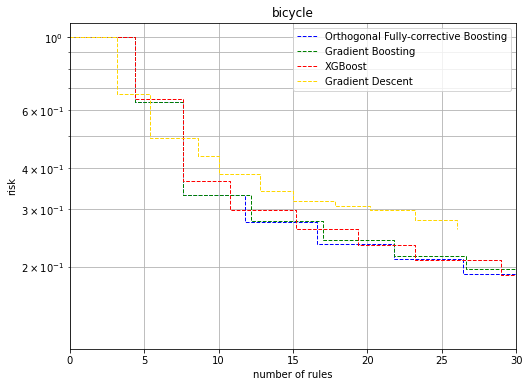

12.342277392898044
0:00:00.371264

0:00:00.357112

0:00:00.539930

0:00:00.509797

0:00:00.463247

orth_fc_Newton-CG: avg train risk: 0.10624587703314381 avg test risk 0.3336504051779969 &s: 20.54
0:00:00.257046

0:00:00.307517

0:00:00.299077

0:00:00.319999

0:00:00.295686

gpe_boosting_: avg train risk: 0.1423130325000928 avg test risk 0.24032479623786035 &s: 19.7
0:00:00.290829

0:00:00.278468

0:00:00.248102

0:00:00.353517

0:00:00.383645

xgb_keep_: avg train risk: 125.32649584577344 avg test risk 156.67576654158586 &s: 17.84
0:00:00.238604

0:00:00.242826

0:00:00.255627

0:00:00.233216

0:00:00.206072

mwg_boosting_: avg train risk: 0.1618926836408376 avg test risk 0.2071864895416368 &s: 15.3
orth_fc_Newton-CG auc: 6.702459117623574
[3.0, 6.6, 10.6, 14.4, 18.8, 23.0, 26.8, 30.6, 33.6, 38.0] [0.26571780775704174, 0.20559724934493, 0.15283994741732562, 0.12091390550708055, 0.09183138035139585, 0.06976691523041878, 0.04995842267189312, 0.041413576192000645, 0.0359942788186383, 0.

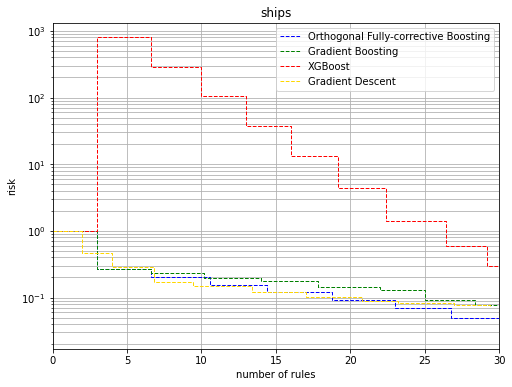

7.500299349437478
0:00:00.307054

0:00:00.322602

0:00:00.280932

0:00:00.308162

0:00:00.285412

orth_fc_Newton-CG: avg train risk: 0.08591136125258023 avg test risk 0.16547821104953214 &s: 15.02
0:00:00.227256

0:00:00.256807

0:00:00.240381

0:00:00.314465

0:00:00.239922

gpe_boosting_: avg train risk: 0.09530235938015126 avg test risk 0.20141039272174557 &s: 16.240000000000002
0:00:00.196628

0:00:00.200440

0:00:00.217163

0:00:00.202900

0:00:00.220600

xgb_keep_: avg train risk: 0.2576325236766237 avg test risk 0.3476377082236764 &s: 13.719999999999999
0:00:00.256065

0:00:00.217851

0:00:00.317807

0:00:00.233794

0:00:00.302915

mwg_boosting_: avg train risk: 0.12591637038917622 avg test risk 0.11901905003092697 &s: 12.459999999999999
orth_fc_Newton-CG auc: 4.255182201694766
[2.0, 4.0, 6.8, 9.8, 13.0, 16.2, 19.6, 23.0, 26.2, 29.6] [0.3032548393124188, 0.1805896649565109, 0.10281816235379601, 0.07211939599478312, 0.05444291450814668, 0.04290366085154499, 0.035260421633587676, 

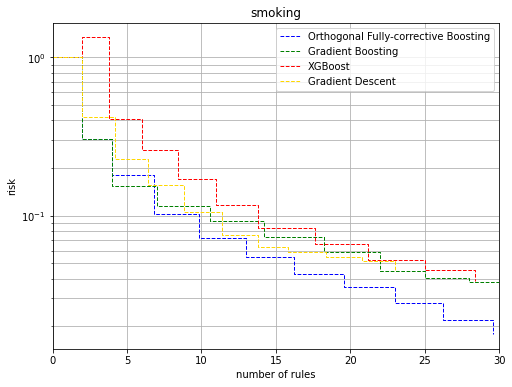

In [8]:
datasets = ['titanic','tic-tac-toe','iris','breast_cancer','load_wine','IBM_HR', 'telco_churn', 'GenderRecognition',
            'banknote', 'liver', 'magic', 'adult', 'digits5',
            'insurance','make_friedman1',
            'make_friedman2','make_friedman3','wage', 'Demographics','gdp','used_cars','load_diabetes',
            'boston','world_happiness_indicator', 'who_life_expectancy', 'mobile_prices', 'suicide_rates_cleaned',
            'videogamesales', 'red_wine_quality',
            'covid_vic','covid',
            'bicycle','ships','smoking']


values = [
    'mwg_boosting_',
    'gpe_boosting_', 
    'xgb_keep_', 
    'orth_fc_Newton-CG']
print(len(datasets))
cols = [10, 10, 10, 5, 6, 3, 4, 3, 10, 10, 5, 5, 3,
        10, 4, 10, 10, 10,
       2, 20, 10, 5, 4, 10, 5, 4, 3, 3, 5,
        10, 10, 10, 10, 10]
max_components = [30] * len(datasets)
max_components[11]=25
max_components[12]=20
max_components[5]=10
f = open("../analysis_results/compare_time20230517times_CC50.csv", 'w')
f.write('dataset'+(','+','.join(values))*4+'\n')
for i in range(len(datasets)):
#     try:
        max_risk = get_max_risk(datasets[i])
        train, test, ands, aucs, rt = compare3(datasets[i], col=cols[i], max_length=max_components[i])
#         print(ands)
        f.write(datasets[i] + ',')
#         for value in values:
#             f.write(str(sum(train[value])/10)+',')
#         for value in values:
#             f.write(str(sum(test[value])/10)+',')
# #         f.write('\n,')
#         for value in values:
#             f.write(str(max(ands[value]))+',')
#         for value in values:
#             f.write(str(aucs[value])+',')
        for value in values:
            f.write(str(rt[value])+',')
        f.write('\n')
#     except:
#         print('Error', datasets[i])
#         f.write('\n')
f.close()

function to get times

In [4]:
from matplotlib import pyplot as plt
from random import random

def compare4(dataset_name, max_risk=1, repeat=5, col=10, 
            max_length=30, title=None):
    test_risks={}
    train_risks={}
    and_counts={}
    aucs={}
    file_numbers={}
    desc=dataset_name
    max_risk=get_max_risk(dataset_name)
    print(max_risk)
    searches=['greedy']
    for search in searches:
        location='../experiment_output_20230413_'+search
        objs = ['mwg','gpe','xgb','orth']
        for obj in objs:
            algos = ['fc'] if obj=='orth' else ['boosting', 'fc'] if obj=='gpe' else ['keep']
            for algo in algos:
                methods = ['Newton-CG'] if algo=='fc' else ['']
                for method in methods:
                    done = True
                    fc_train=[0]*10
                    fc_test=[0]*10
                    ands = [0]*10
                    file_number=0
                    for i in range(repeat):
                        filename = dataset_name + '_' + obj + '_' + algo + '_' + method + '_realkd_col_' + \
                            str(col) + '_rep' + str(i) + '.txt'
                        try:
                            f = open(location+'/'+dataset_name+'/'+filename, 'r')
                            file_number+=1
                        except:
                            print(obj, algo, method,'does not exist: ')
                            print(location+'/'+dataset_name+'/'+filename)
                            continue
                        j=-1
                        for line in f:
                            if 'iteration ' in line:
                                j+=1
                            if j>=10:
                                break
                            words=line.split(' ')
                            if 'fc train risk' in line:
                                fc_train[j] += float(words[-1])
                            elif 'fc test risk' in line:
                                fc_test[j] += float(words[-1])
                            if 'if' in line:
                                ands[j]+=line.count('=')+1
                    if done:
                        file_numbers[search+'_'+obj + '_' + algo + '_' + method] = file_number
                        train_risks[search+'_'+obj + '_' + algo + '_' + method]=fc_train
                        test_risks[search+'_'+obj + '_' + algo + '_' + method]=fc_test
                        and_counts[search+'_'+obj + '_' + algo + '_' + method]=ands
                        if file_number==0:
                            continue
                        print(obj + '_' + algo + '_' + method+': avg train risk:',sum(fc_train)/10/max_risk/file_number, 
                              'avg test risk', sum(fc_test)/10/max_risk/file_number, '&s:', sum(ands)/10/file_number)

    rg=list(range(1,11))
    plt.figure(figsize=(8,6))
    colours = {}
    line_width = {}
    width = [1,1, 1, 1]*4
    i = 0
    colors=['blue','green','red','gold','deepskyblue','violet','cyan','brown','deepskyblue','purple', 'lime',
            'slategray','magenta','pink','olive','khaki']
    label_map={'greedy_gpe_boosting_':'Gradient Boosting', 'greedy_gpe_fc_Newton-CG': 'Gradient Fully-corrective Boosting', 
               'greedy_orth_fc_Newton-CG': 'Greedy Orthogonal Fully-corrective Boosting', 'xgb_keep_': 'XGBoost', 
              'xgb_fc_Newton-CG': 'XG Fully-corrective Boosting',
               'exhaustive_orth_fc_Newton-CG': 'Optimal Orthogonal Fully-corrective Boosting'
              }
    for item in train_risks:
        color = colors[i]
        colours[item] = color
        line_width[item] = width[i]
        i+=1
        if file_numbers[item]==0:
            continue
        train_risks[item] = [risk / max_risk/file_numbers[item] for risk in train_risks[item]]
        test_risks[item] = [risk / max_risk/file_numbers[item] for risk in test_risks[item]]
        and_counts[item] = [ands / file_numbers[item] for ands in and_counts[item]]
        aucs[item] = and_counts[item][0]+sum((train_risks[item][m])*
                                             (min(max_length, and_counts[item][m+1])-
                                                                   min(max_length, and_counts[item][m]))
                                for m in range(len(train_risks[item])-1))
        print(item, 'auc:', aucs[item])
        print(and_counts[item])
        plt.step([0]+and_counts[item], [1]+train_risks[item], '--', color=colours[item],
                 label=label_map[item],linewidth=line_width[item],where='post')
    plt.title(dataset_name if title is None else title + " risks")
    plt.xlabel('number of rules')
    plt.xlim(0,30)
    plt.ylabel('risk')
    plt.yscale('log')
    plt.grid(visible=True, which='major')
    plt.grid(visible=True, which='minor')
    plt.gca().set_ylim(bottom=0)
    plt.legend()
    plt.show()
    
    return train_risks, test_risks, and_counts, aucs

In [5]:
import numpy as np
import matplotlib.pyplot as plt
def plot_times(tic_gpes, tic_xgbs, tic_orths, tic_new_orths, tic_mwgs, savefile):
    tic_gpe_times=np.array([])
    tic_xgb_times=np.array([])
    tic_orth_times=np.array([])
    new_orth_times=np.array([])
    mwg_times = np.array([])
    for i in range(len(tic_orths)):
        tic_gpe_times = np.append(tic_gpe_times, hmstoseconds(tic_gpes[i]))
        tic_xgb_times = np.append(tic_xgb_times, hmstoseconds(tic_xgbs[i]))
        tic_orth_times = np.append(tic_orth_times, hmstoseconds(tic_orths[i]))
        new_orth_times = np.append(new_orth_times, hmstoseconds(tic_new_orths[i]))
        mwg_times = np.append(mwg_times, hmstoseconds(tic_mwgs[i]))
    tic_gpe_times_sum=np.cumsum(tic_gpe_times)
    tic_xgb_times_sum=np.cumsum(tic_xgb_times)
    tic_orth_times_sum=np.cumsum(tic_orth_times)
    new_orth_times_sum = np.cumsum(new_orth_times)
    mwg_times_sum = np.cumsum(mwg_times)
    print(tic_gpe_times_sum)
    rg=list(range(1, len(tic_orths)+1))
    plt.figure(figsize=(3.5,3.5))
    plt.plot(rg, mwg_times_sum, 'v-', label='Gradient Sum')
    plt.plot(rg, tic_gpe_times_sum, 'o-', label='Gradient Boosting')
    plt.plot(rg, tic_xgb_times_sum, '>-', label='XGBoost')
    plt.plot(rg, tic_orth_times_sum, '^-', label='Naive FCOGB')
    plt.plot(rg, new_orth_times_sum, 's-', label='FCOGB')
    plt.xlabel('number of rules')
#     plt.ylabel("time (seconds)")
    plt.legend()
    plt.grid()
    plt.savefig(savefile, bbox_inches = "tight") 

In [6]:
breast_gpe=['0:00:00.755056', '0:00:01.004230', '0:00:02.855858', '0:00:24.140140', '0:00:38.435723', '0:00:13.188960', '0:00:13.230922', '0:00:09.130535', '0:00:19.637853', '0:00:27.656477']
breast_xgb=['0:00:00.570690', '0:00:00.761002', '0:00:00.607723', '0:00:05.184244', '0:00:14.487850', '0:00:35.468122', '0:00:32.742045', '0:00:31.813855', '0:00:04.584688', '0:00:12.367203']
breast_orth=['0:00:00.475959', '0:00:00.852424', '0:00:05.586782', '0:00:33.590988', '0:00:45.237771', '0:00:43.558474', '0:01:01.536916', '0:01:08.900363', '0:01:08.325182', '0:01:03.280388']
breast_fast=['0:00:00.453358', '0:00:00.731647', '0:00:01.539592', '0:00:21.755362', '0:00:37.350054', '0:00:05.816117', '0:00:24.114822', '0:00:26.122812', '0:00:33.889967', '0:00:53.636361']
breast_mwg=['0:00:00.887125', '0:00:00.879971', '0:00:00.973911', '0:00:00.962496', '0:00:01.329237', '0:00:00.922350', '0:00:00.861245', '0:00:00.810215', '0:00:01.810805', '0:00:01.128920']

[  0.755056   1.759286   4.615144  28.755284  67.191007  80.379967
  93.610889 102.741424 122.379277 150.035754]


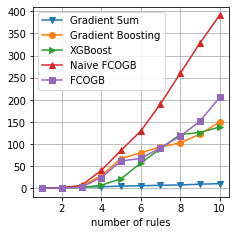

In [7]:
plot_times(breast_gpe, breast_xgb, breast_orth, breast_fast, breast_mwg, 'breast_time')

In [8]:
breast_gpe=['0:00:00.406505', '0:00:00.560280', '0:00:01.702461', '0:00:14.553819', '0:00:27.108825', '0:00:09.871768', '0:00:10.301562', '0:00:06.964814', '0:00:15.293720', '0:00:20.340739', '0:00:21.768332', '0:00:25.533367', '0:00:49.456761', '0:00:55.468829', '0:00:54.520400', '0:00:29.217624', '0:00:31.354829', '0:00:51.274517', '0:00:51.461184', '0:00:46.750567', '0:00:46.743888', '0:00:13.894905', '0:01:03.004780', '0:00:50.579376', '0:00:57.639416', '0:00:53.311267', '0:00:49.001205', '0:00:48.162377', '0:00:47.401490', '0:00:50.156078']
breast_xgb=['0:00:00.403796', '0:00:00.560904', '0:00:00.439962', '0:00:03.889207', '0:00:10.818655', '0:00:26.897559', '0:00:24.838816', '0:00:23.705041', '0:00:03.388681', '0:00:09.123499', '0:00:09.951643', '0:00:20.358218', '0:00:51.237772', '0:00:51.354723', '0:00:22.844702', '0:00:25.063935', '0:00:20.973246', '0:00:36.215483', '0:00:39.108032', '0:00:33.456499', '0:00:40.557702', '0:00:42.468474', '0:00:40.828234', '0:00:49.259070', '0:00:47.165758', '0:00:49.952720', '0:00:55.682319', '0:00:56.585145', '0:00:55.843562', '0:00:55.252382']
breast_orth=['0:00:00.483121', '0:00:02.132415', '0:00:11.981941', '0:01:43.854643', '0:01:58.801041', '0:02:09.068087', '0:03:31.150220', '0:03:39.652336', '0:01:08.032532', '0:01:24.159867', '0:02:13.884706', '0:01:37.463286', '0:06:18.941240', '0:06:28.689709', '0:06:27.578994', '0:02:41.389887', '0:07:01.275624', '0:01:01.985888', '0:06:50.597620', '0:07:38.523376', '0:08:42.834547', '0:06:36.588280', '0:07:22.511476', '0:06:24.612111', '0:06:46.804795', '0:07:05.643654', '0:06:03.904657', '0:06:58.027888', '0:06:40.555493', '0:05:59.557502']
breast_fast=['0:00:00.400968', '0:00:00.780109', '0:00:03.483080', '0:00:29.406922', '0:00:33.494007', '0:00:39.609077', '0:01:00.055821', '0:01:03.349703', '0:01:07.703431', '0:01:05.220681', '0:00:55.607666', '0:01:30.985464', '0:03:06.941522', '0:03:04.931654', '0:03:00.515616', '0:03:24.580357', '0:03:22.060183', '0:03:29.020018', '0:03:59.831680', '0:03:44.777336', '0:04:03.025658', '0:04:04.710815', '0:03:51.353551', '0:05:14.916452', '0:05:01.001751', '0:05:50.362021', '0:06:06.413271', '0:06:02.523277', '0:06:32.942329', '0:06:32.279807']
breast_mwg=['0:00:00.356508', '0:00:00.379050', '0:00:00.356466', '0:00:00.361820', '0:00:00.356925', '0:00:00.360640', '0:00:00.360583', '0:00:00.363663', '0:00:00.359436', '0:00:00.362724', '0:00:00.361838', '0:00:00.361417', '0:00:00.366286', '0:00:00.363237', '0:00:00.385227', '0:00:00.362971', '0:00:00.363618', '0:00:00.366301', '0:00:00.362654', '0:00:00.366871', '0:00:00.366345', '0:00:00.368137', '0:00:00.372855', '0:00:00.370632', '0:00:00.371798', '0:00:00.369534', '0:00:00.390336', '0:00:00.370717', '0:00:00.372341', '0:00:00.374486']

[4.06505000e-01 9.66785000e-01 2.66924600e+00 1.72230650e+01
 4.43318900e+01 5.42036580e+01 6.45052200e+01 7.14700340e+01
 8.67637540e+01 1.07104493e+02 1.28872825e+02 1.54406192e+02
 2.03862953e+02 2.59331782e+02 3.13852182e+02 3.43069806e+02
 3.74424635e+02 4.25699152e+02 4.77160336e+02 5.23910903e+02
 5.70654791e+02 5.84549696e+02 6.47554476e+02 6.98133852e+02
 7.55773268e+02 8.09084535e+02 8.58085740e+02 9.06248117e+02
 9.53649607e+02 1.00380568e+03]


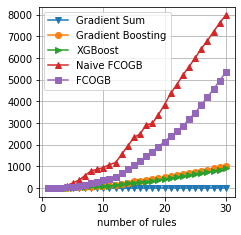

In [9]:
plot_times(breast_gpe, breast_xgb, breast_orth, breast_fast, breast_mwg, 'breast_time')

[0.275787 0.532643 0.790508 1.058243 1.335162 1.589159 1.841947 2.093031
 2.340618 2.602742]


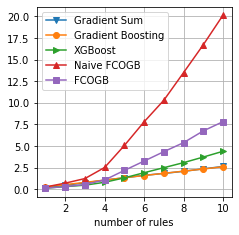

In [10]:
dia_gpe=['0:00:00.275787', '0:00:00.256856', '0:00:00.257865', '0:00:00.267735', '0:00:00.276919', '0:00:00.253997', '0:00:00.252788', '0:00:00.251084', '0:00:00.247587', '0:00:00.262124']
dia_xgb=['0:00:00.129437', '0:00:00.173532', '0:00:00.169680', '0:00:00.330890', '0:00:00.514597', '0:00:00.593593', '0:00:00.582354', '0:00:00.582483', '0:00:00.646505', '0:00:00.669529']
dia_orth=['0:00:00.261875', '0:00:00.442666', '0:00:00.531185', '0:00:01.282464', '0:00:02.543548', '0:00:02.734470', '0:00:02.499395', '0:00:03.194786', '0:00:03.223186', '0:00:03.424006' ]
dia_orth_new=['0:00:00.126477', '0:00:00.182577', '0:00:00.235198', '0:00:00.526444', '0:00:01.108148', '0:00:01.079305', '0:00:01.087228', '0:00:01.042202', '0:00:01.360436', '0:00:01.068484']
dia_mwg='0:00:00.199587', '0:00:00.265704', '0:00:00.279405', '0:00:00.310120', '0:00:00.269302', '0:00:00.283670', '0:00:00.225191', '0:00:00.240200', '0:00:00.285253', '0:00:00.273900'
plot_times(dia_gpe, dia_xgb, dia_orth, dia_orth_new, dia_mwg, 'diabete_time')

[ 0.10351   0.238297  0.362093  0.648121  1.062152  1.556763  2.020498
  2.484878  3.013081  3.548475  4.103591  4.603465  5.081789  5.693053
  6.307559  6.936564  7.526583  8.125106  8.771456  9.350271 10.025379
 10.712943 11.421596 12.119274 12.869998 13.598063 14.337923 15.078539
 15.845248 16.655191]


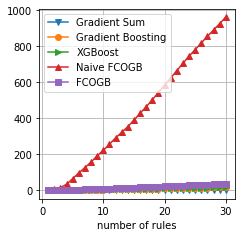

In [11]:
dia_gpe=['0:00:00.103510', '0:00:00.134787', '0:00:00.123796', '0:00:00.286028', '0:00:00.414031', 
         '0:00:00.494611', '0:00:00.463735', '0:00:00.464380', '0:00:00.528203', '0:00:00.535394',
         '0:00:00.555116', '0:00:00.499874', '0:00:00.478324', '0:00:00.611264', '0:00:00.614506', 
         '0:00:00.629005', '0:00:00.590019', '0:00:00.598523', '0:00:00.646350', '0:00:00.578815', 
         '0:00:00.675108', '0:00:00.687564', '0:00:00.708653', '0:00:00.697678', '0:00:00.750724', 
         '0:00:00.728065', '0:00:00.739860', '0:00:00.740616', '0:00:00.766709', '0:00:00.809943']
dia_xgb=['0:00:00.101476', '0:00:00.136520', '0:00:00.127229', '0:00:00.271208', '0:00:00.434594', 
         '0:00:00.536455', '0:00:00.487210', '0:00:00.487452', '0:00:00.554585', '0:00:00.553281', 
         '0:00:00.597681', '0:00:00.521175', '0:00:00.497266', '0:00:00.613167', '0:00:00.627746', '0:00:00.624210', '0:00:00.644485', '0:00:00.594139', '0:00:00.638265', '0:00:00.595829', '0:00:00.640615', '0:00:00.705630', '0:00:00.704075', '0:00:00.688187', '0:00:00.751316', '0:00:00.732259', '0:00:00.744667', '0:00:00.808221', '0:00:00.757735', '0:00:00.804032']
dia_orth=['0:00:02.248208', '0:00:03.615200', '0:00:08.224419', '0:00:18.746083', '0:00:31.232185', '0:00:31.703506', '0:00:29.931909', '0:00:30.305490', '0:00:34.990934', '0:00:30.405123', '0:00:33.671548', '0:00:35.727131', '0:00:30.296994', '0:00:32.239733', '0:00:35.501676', '0:00:38.951505', '0:00:35.336256', '0:00:39.319131', '0:00:40.709282', '0:00:39.862934', '0:00:41.079913', '0:00:40.367835', '0:00:40.874575', '0:00:39.474842', '0:00:36.500151', '0:00:37.366468', '0:00:36.644918', '0:00:35.158913', '0:00:35.704946', '0:00:35.908725']
dia_orth_new=['0:00:00.110631', '0:00:00.144323', '0:00:00.213029', '0:00:00.488463', '0:00:01.085711', '0:00:01.024487', '0:00:01.031993', '0:00:00.977741', '0:00:01.300586', '0:00:00.989023', '0:00:01.212845', '0:00:01.379231', '0:00:01.123314', '0:00:01.173396', '0:00:01.302149', '0:00:01.430413', '0:00:01.313681', '0:00:01.491008', '0:00:01.470904', '0:00:01.426336', '0:00:01.431963', '0:00:01.556189', '0:00:01.508243', '0:00:01.491381', '0:00:01.575082', '0:00:01.444517', '0:00:01.488305', '0:00:01.455150', '0:00:01.458984', '0:00:01.449798']
dia_mwg=['0:00:00.124338', '0:00:00.100532', '0:00:00.097210', '0:00:00.097764', '0:00:00.098303', '0:00:00.099054', '0:00:00.098812', '0:00:00.098764', '0:00:00.099961', '0:00:00.100772', '0:00:00.100206', '0:00:00.105040', '0:00:00.104563', '0:00:00.104328', '0:00:00.103112', '0:00:00.101332', '0:00:00.101725', '0:00:00.122865', '0:00:00.102822', '0:00:00.104142', '0:00:00.104866', '0:00:00.104308', '0:00:00.105029', '0:00:00.106711', '0:00:00.107707', '0:00:00.107743', '0:00:00.105426', '0:00:00.117043', '0:00:00.112494', '0:00:00.110970']
plot_times(dia_gpe, dia_xgb, dia_orth, dia_orth_new, dia_mwg, 'diabete_time')

[0.275787 0.532643 0.790508 1.058243 1.335162 1.589159 1.841947 2.093031
 2.340618 2.602742]


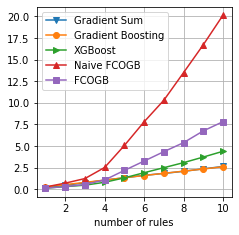

In [12]:
dia_gpe=['0:00:00.275787', '0:00:00.256856', '0:00:00.257865', '0:00:00.267735', '0:00:00.276919', '0:00:00.253997', '0:00:00.252788', '0:00:00.251084', '0:00:00.247587', '0:00:00.262124']
dia_xgb=['0:00:00.129437', '0:00:00.173532', '0:00:00.169680', '0:00:00.330890', '0:00:00.514597', '0:00:00.593593', '0:00:00.582354', '0:00:00.582483', '0:00:00.646505', '0:00:00.669529']
dia_orth=['0:00:00.261875', '0:00:00.442666', '0:00:00.531185', '0:00:01.282464', '0:00:02.543548', '0:00:02.734470', '0:00:02.499395', '0:00:03.194786', '0:00:03.223186', '0:00:03.424006' ]
dia_orth_new=['0:00:00.126477', '0:00:00.182577', '0:00:00.235198', '0:00:00.526444', '0:00:01.108148', '0:00:01.079305', '0:00:01.087228', '0:00:01.042202', '0:00:01.360436', '0:00:01.068484']
dia_mwg='0:00:00.199587', '0:00:00.265704', '0:00:00.279405', '0:00:00.310120', '0:00:00.269302', '0:00:00.283670', '0:00:00.225191', '0:00:00.240200', '0:00:00.285253', '0:00:00.273900'
plot_times(dia_gpe, dia_xgb, dia_orth, dia_orth_new, dia_mwg, 'diabete_time')

In [12]:
import numpy as np
import matplotlib.pyplot as plt
def plot_times_comp(tic_gpes, tic_xgbs, tic_orths, tic_new_orths, tic_mwgs, comp_gpe, comp_xgb, 
                    comp_orth, comp_new_orth, comp_mwg,savefile, show_label=False, xlim=[0,40]):
    tic_gpe_times=np.array([])
    tic_xgb_times=np.array([])
    tic_orth_times=np.array([])
    new_orth_times=np.array([])
    mwg_times = np.array([])
    for i in range(len(tic_gpes)):
        tic_gpe_times = np.append(tic_gpe_times, hmstoseconds(tic_gpes[i]))
    for i in range(len(tic_xgbs)):
        tic_xgb_times = np.append(tic_xgb_times, hmstoseconds(tic_xgbs[i]))
    for i in range(len(tic_orths)):
        tic_orth_times = np.append(tic_orth_times, hmstoseconds(tic_orths[i]))
        new_orth_times = np.append(new_orth_times, hmstoseconds(tic_new_orths[i]))
    for i in range(len(tic_mwgs)):
        mwg_times = np.append(mwg_times, hmstoseconds(tic_mwgs[i]))
    tic_gpe_times_sum=np.cumsum(tic_gpe_times)
    tic_xgb_times_sum=np.cumsum(tic_xgb_times)
    tic_orth_times_sum=np.cumsum(tic_orth_times)
    new_orth_times_sum = np.cumsum(new_orth_times)
    mwg_times_sum = np.cumsum(mwg_times)
    plt.figure(figsize=(3.5,3.5))
    plt.plot(comp_mwg, mwg_times_sum[:len(comp_mwg)], 'v-', label='Gradient Sum')
    plt.plot(comp_gpe, tic_gpe_times_sum[:len(comp_gpe)], 'o-', label='Gradient Boosting')
    plt.plot(comp_xgb, tic_xgb_times_sum[:len(comp_xgb)], '>-', label='XGBoost')
    plt.plot(comp_orth, tic_orth_times_sum[:len(comp_orth)], '^-', label='Naive FCOGB')
    plt.plot(comp_new_orth, new_orth_times_sum[:len(comp_new_orth)], 's-', label='FCOGB')
    plt.xlabel('cognitive complexity')
    plt.xlim(xlim)
    if show_label:
        plt.ylabel("time (seconds)")
        plt.legend()
    plt.grid()
    plt.savefig(savefile, bbox_inches = "tight") 

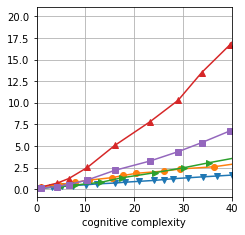

In [13]:
dia_gpe_comp=[1.0, 4.6, 7.8, 10.8, 15.4, 17.8, 20.4, 26.0, 29.4,36.4, 43.4]
dia_xgb_comp=[1.0, 4.8, 7.8, 13.2, 17.4, 24.2, 30.2, 35.4, 41.6]
dia_orth_comp=[1.0, 4.2, 6.6, 10.4, 16.0, 23.2, 29.0, 33.8, 39.6, 44.6]
dia_orth_new_comp=[1.0, 4.2, 6.6, 10.4, 16.0, 23.2, 29.0, 33.8, 39.6, 44.6]
dia_mwg_comp=[1.0, 3.2, 5.2, 7.4, 10.2, 12.4, 16.0, 18.2, 21.0, 24.0, 26.0,28.0,31.0,34.0, 37.0, 40.0]
dia_gpe=['0:00:00.275787', '0:00:00.256856', '0:00:00.257865', '0:00:00.267735', '0:00:00.276919', '0:00:00.253997', '0:00:00.252788', '0:00:00.251084', '0:00:00.247587', '0:00:00.262124', '0:00:00.555116']
dia_xgb=['0:00:00.129437', '0:00:00.173532', '0:00:00.169680', '0:00:00.330890', '0:00:00.514597', '0:00:00.593593', '0:00:00.582354', '0:00:00.582483', '0:00:00.646505', '0:00:00.669529']
dia_orth=['0:00:00.261875', '0:00:00.442666', '0:00:00.531185', '0:00:01.282464', '0:00:02.543548', '0:00:02.734470', '0:00:02.499395', '0:00:03.194786', '0:00:03.223186', '0:00:03.424006' ]
dia_orth_new=['0:00:00.126477', '0:00:00.182577', '0:00:00.235198', '0:00:00.526444', '0:00:01.108148', '0:00:01.079305', '0:00:01.087228', '0:00:01.042202', '0:00:01.360436', '0:00:01.068484']
dia_mwg=['0:00:00.124338', '0:00:00.100532', '0:00:00.097210', '0:00:00.097764', '0:00:00.098303', '0:00:00.099054', '0:00:00.098812', '0:00:00.098764', '0:00:00.099961', '0:00:00.100772', '0:00:00.100206', '0:00:00.105040', '0:00:00.104563', '0:00:00.104328', '0:00:00.103112', '0:00:00.101332', '0:00:00.101725', '0:00:00.122865', '0:00:00.102822', '0:00:00.104142', '0:00:00.104866', '0:00:00.104308', '0:00:00.105029', '0:00:00.106711', '0:00:00.107707', '0:00:00.107743', '0:00:00.105426', '0:00:00.117043', '0:00:00.112494', '0:00:00.110970']
plot_times_comp(dia_gpe, dia_xgb, dia_orth, dia_orth_new, dia_mwg, dia_gpe_comp, dia_xgb_comp, dia_orth_comp, 
                dia_orth_new_comp, dia_mwg_comp, 'diabete_time_comp.pdf', show_label=False)

In [14]:
breast_gpe_comp=[2.0, 7.6, 12.4, 14.8, 21.0, 25.6, 29.4, 33.4, 37.6, 44.6]
breast_xgb_comp=[2.0, 7.6, 10.0, 16.4, 19.8, 26.2, 31.4, 37.0, 42.0]
breast_orth_comp=[2.0, 7.6, 12.4, 19.8, 26.2, 32.0, 39.2, 46.2]
breast_orth_new_comp=[2.0, 7.6, 12.4, 19.8, 26.2, 32.0, 39.2, 46.2]
breast_mwg_comp=[2.0, 6.8, 8.8, 12.4, 14.4, 18.6, 21.0, 24.8, 27.6, 30.6,33.6,36.6,39.6,44.6]
breast_gpe=['0:00:00.755056', '0:00:01.004230', '0:00:02.855858', '0:00:24.140140', '0:00:38.435723', '0:00:13.188960', '0:00:13.230922', '0:00:09.130535', '0:00:19.637853', '0:00:27.656477', '0:00:21.768332', '0:00:25.533367', '0:00:49.456761', '0:00:55.468829']
breast_xgb=['0:00:00.570690', '0:00:00.761002', '0:00:00.607723', '0:00:05.184244', '0:00:14.487850', '0:00:35.468122', '0:00:32.742045', '0:00:31.813855', '0:00:04.584688', '0:00:12.367203', '0:00:09.951643', '0:00:20.358218', '0:00:51.237772', '0:00:51.354723']
breast_orth=['0:00:00.475959', '0:00:00.852424', '0:00:05.586782', '0:00:33.590988', '0:00:45.237771', '0:00:43.558474', '0:01:01.536916', '0:01:08.900363', '0:01:08.325182', '0:01:03.280388', '0:02:13.884706', '0:01:37.463286', '0:06:18.941240', '0:06:28.689709']
breast_fast=['0:00:00.453358', '0:00:00.731647', '0:00:01.539592', '0:00:21.755362', '0:00:37.350054', '0:00:05.816117', '0:00:24.114822', '0:00:26.122812', '0:00:33.889967', '0:00:53.636361', '0:00:55.607666', '0:01:30.985464', '0:03:06.941522', '0:03:04.931654']
breast_mwg=['0:00:00.887125', '0:00:00.879971', '0:00:00.973911', '0:00:00.962496', '0:00:01.329237', '0:00:00.922350', '0:00:00.861245', '0:00:00.810215', '0:00:01.810805', '0:00:01.128920', '0:00:00.361838', '0:00:00.361417', '0:00:00.366286', '0:00:00.363237']
lot_times_comp(breast_gpe, breast_xgb, breast_orth, breast_fast, breast_mwg, breast_gpe_comp, breast_xgb_comp, breast_orth_comp,
           breast_orth_new_comp, breast_mwg_comp,'breast_time_comp.pdf', show_label=True)

NameError: name 'lot_times_comp' is not defined

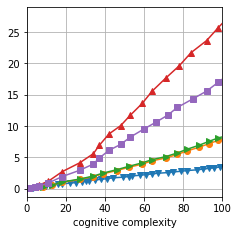

In [15]:
dia_gpe_comp=[1, 5, 8, 13, 18, 27, 34, 39, 46, 52, 59, 64, 71, 77, 82, 88, 93, 98, 106]
dia_xgb_comp=[1, 5, 8, 13, 18, 27, 34, 39, 46, 52, 59, 64, 71, 77, 82, 88, 93, 98, 106]
dia_orth_comp=[1, 4, 6, 11, 18, 27, 34, 37, 42, 48, 53, 59, 64, 71, 78, 84, 92, 98, 104]
dia_orth_new_comp=[1, 4, 6, 11, 18, 27, 34, 37, 42, 48, 53, 60, 66, 72, 77, 85, 92, 98, 104]
dia_mwg_comp=[1.0, 3, 5, 7, 10, 12, 16, 18, 22, 25, 28, 30, 32, 35, 38, 41, 44, 49, 52, 54, 58, 61, 64, 67, 72, 75, 79, 82, 87, 90, 93, 96, 99, 102]
dia_gpe=['0:00:00.100196', '0:00:00.129715', '0:00:00.124186', '0:00:00.256972', '0:00:00.405051', '0:00:00.466153', '0:00:00.466294', '0:00:00.443370', '0:00:00.515494', '0:00:00.501702', '0:00:00.524077', '0:00:00.511384', '0:00:00.465505', '0:00:00.563087', '0:00:00.566780', '0:00:00.569517', '0:00:00.561589', '0:00:00.567482', '0:00:00.585875', '0:00:00.555124', '0:00:00.602520', '0:00:00.637536', '0:00:00.667510', '0:00:00.636525', '0:00:00.684716', '0:00:00.639576', '0:00:00.693248', '0:00:00.676832', '0:00:00.681608', '0:00:00.710903']
dia_xgb=['0:00:00.097634', '0:00:00.131106', '0:00:00.122054', '0:00:00.266605', '0:00:00.445277', '0:00:00.490517', '0:00:00.470283', '0:00:00.482078', '0:00:00.538710', '0:00:00.521768', '0:00:00.570111', '0:00:00.505091', '0:00:00.482170', '0:00:00.591344', '0:00:00.592828', '0:00:00.625360', '0:00:00.610343', '0:00:00.577371', '0:00:00.613363', '0:00:00.571138', '0:00:00.639831', '0:00:00.657339', '0:00:00.669735', '0:00:00.666323', '0:00:00.720217', '0:00:00.700937', '0:00:00.707068', '0:00:00.699925', '0:00:00.715988', '0:00:00.790004']
dia_orth=['0:00:00.136866', '0:00:00.153882', '0:00:00.266204', '0:00:00.655550', '0:00:01.509379', '0:00:01.415597', '0:00:01.461262', '0:00:01.315762', '0:00:01.830593', '0:00:01.334124', '0:00:01.683102', '0:00:01.850447', '0:00:01.933272', '0:00:02.095181', '0:00:01.991893', '0:00:02.081550', '0:00:01.935464', '0:00:02.079634', '0:00:01.971359', '0:00:01.863930', '0:00:01.721504', '0:00:01.722855', '0:00:02.050433', '0:00:01.957367', '0:00:02.160142', '0:00:02.058508', '0:00:02.235207', '0:00:02.000362', '0:00:01.979691', '0:00:01.866605']
dia_orth_new=['0:00:00.107858', '0:00:00.137800', '0:00:00.207216', '0:00:00.470080', '0:00:01.020107', '0:00:01.002571', '0:00:01.005131', '0:00:00.940006', '0:00:01.240127', '0:00:00.951735', '0:00:01.176796', '0:00:01.299440', '0:00:01.055947', '0:00:01.114347', '0:00:01.248422', '0:00:01.380922', '0:00:01.226841', '0:00:01.426392', '0:00:01.399525', '0:00:01.367734', '0:00:01.399446', '0:00:01.439865', '0:00:01.450759', '0:00:01.437119', '0:00:01.477718', '0:00:01.379898', '0:00:01.411036', '0:00:01.383746', '0:00:01.362706', '0:00:01.365379']
dia_mwg=['0:00:00.098980', '0:00:00.098583', '0:00:00.097936', '0:00:00.098791', '0:00:00.100077', '0:00:00.099479', '0:00:00.098945', '0:00:00.099161', '0:00:00.099734', '0:00:00.101666', '0:00:00.102295', '0:00:00.104264', '0:00:00.103947', '0:00:00.103205', '0:00:00.103562', '0:00:00.102665', '0:00:00.128351', '0:00:00.103320', '0:00:00.103774', '0:00:00.105292', '0:00:00.104281', '0:00:00.106420', '0:00:00.104839', '0:00:00.105519', '0:00:00.105248', '0:00:00.106251', '0:00:00.108207', '0:00:00.112088', '0:00:00.111977', '0:00:00.112539', '0:00:00.112539', '0:00:00.112539', '0:00:00.112539', '0:00:00.112539']
plot_times_comp(dia_gpe, dia_xgb, dia_orth, dia_orth_new, dia_mwg, dia_gpe_comp, dia_xgb_comp, dia_orth_comp, 
                dia_orth_new_comp, dia_mwg_comp, 'diabete_time_comp2.pdf', show_label=False, xlim=[0,100])

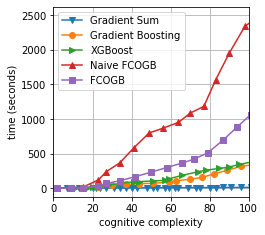

In [16]:
breast_gpe_comp=[2.0, 9, 15, 23, 30, 37, 44, 51, 59, 63, 70, 76, 82, 89, 96, 103]
breast_xgb_comp=[2.0, 9, 11, 17, 20, 28, 34, 41, 44, 51, 57, 59, 66, 74, 78, 85, 90, 95, 102]
breast_orth_comp=[2.0, 9, 15, 23, 27, 34, 41, 49, 56, 64, 70, 77, 83, 90, 98, 106]
breast_orth_new_comp=[2.0, 9, 15, 23, 27, 34, 42, 50, 58, 66, 72, 79, 87, 94, 101]
breast_mwg_comp=[2, 7, 9, 13, 15, 20, 22, 24, 27, 31, 34, 37, 40, 43, 48, 51, 53, 57, 59, 62, 64, 69, 73, 75, 80, 83, 87, 91, 96, 101]
breast_gpe=['0:00:00.406505', '0:00:00.560280', '0:00:01.702461', '0:00:14.553819', '0:00:27.108825', '0:00:09.871768', '0:00:10.301562', '0:00:06.964814', '0:00:15.293720', '0:00:20.340739', '0:00:21.768332', '0:00:25.533367', '0:00:49.456761', '0:00:55.468829', '0:00:54.520400', '0:00:29.217624', '0:00:31.354829', '0:00:51.274517', '0:00:51.461184', '0:00:46.750567', '0:00:46.743888', '0:00:13.894905', '0:01:03.004780', '0:00:50.579376', '0:00:57.639416', '0:00:53.311267', '0:00:49.001205', '0:00:48.162377', '0:00:47.401490', '0:00:50.156078']
breast_xgb=['0:00:00.403796', '0:00:00.560904', '0:00:00.439962', '0:00:03.889207', '0:00:10.818655', '0:00:26.897559', '0:00:24.838816', '0:00:23.705041', '0:00:03.388681', '0:00:09.123499', '0:00:09.951643', '0:00:20.358218', '0:00:51.237772', '0:00:51.354723', '0:00:22.844702', '0:00:25.063935', '0:00:20.973246', '0:00:36.215483', '0:00:39.108032', '0:00:33.456499', '0:00:40.557702', '0:00:42.468474', '0:00:40.828234', '0:00:49.259070', '0:00:47.165758', '0:00:49.952720', '0:00:55.682319', '0:00:56.585145', '0:00:55.843562', '0:00:55.252382']
breast_orth=['0:00:00.483121', '0:00:02.132415', '0:00:11.981941', '0:01:43.854643', '0:01:58.801041', '0:02:09.068087', '0:03:31.150220', '0:03:39.652336', '0:01:08.032532', '0:01:24.159867', '0:02:13.884706', '0:01:37.463286', '0:06:18.941240', '0:06:28.689709', '0:06:27.578994', '0:02:41.389887', '0:07:01.275624', '0:01:01.985888', '0:06:50.597620', '0:07:38.523376', '0:08:42.834547', '0:06:36.588280', '0:07:22.511476', '0:06:24.612111', '0:06:46.804795', '0:07:05.643654', '0:06:03.904657', '0:06:58.027888', '0:06:40.555493', '0:05:59.557502']
breast_fast=['0:00:00.400968', '0:00:00.780109', '0:00:03.483080', '0:00:29.406922', '0:00:33.494007', '0:00:39.609077', '0:01:00.055821', '0:01:03.349703', '0:01:07.703431', '0:01:05.220681', '0:00:55.607666', '0:01:30.985464', '0:03:06.941522', '0:03:04.931654', '0:03:00.515616', '0:03:24.580357', '0:03:22.060183', '0:03:29.020018', '0:03:59.831680', '0:03:44.777336', '0:04:03.025658', '0:04:04.710815', '0:03:51.353551', '0:05:14.916452', '0:05:01.001751', '0:05:50.362021', '0:06:06.413271', '0:06:02.523277', '0:06:32.942329', '0:06:32.279807']
breast_mwg=['0:00:00.356508', '0:00:00.379050', '0:00:00.356466', '0:00:00.361820', '0:00:00.356925', '0:00:00.360640', '0:00:00.360583', '0:00:00.363663', '0:00:00.359436', '0:00:00.362724', '0:00:00.361838', '0:00:00.361417', '0:00:00.366286', '0:00:00.363237', '0:00:00.385227', '0:00:00.362971', '0:00:00.363618', '0:00:00.366301', '0:00:00.362654', '0:00:00.366871', '0:00:00.366345', '0:00:00.368137', '0:00:00.372855', '0:00:00.370632', '0:00:00.371798', '0:00:00.369534', '0:00:00.390336', '0:00:00.370717', '0:00:00.372341', '0:00:00.374486']
plot_times_comp(breast_gpe, breast_xgb, breast_orth, breast_fast, breast_mwg, breast_gpe_comp, breast_xgb_comp, breast_orth_comp,
           breast_orth_new_comp, breast_mwg_comp,'breast_time_comp2.pdf', show_label=True, xlim=[0,100])

In [93]:
import numpy as np
import matplotlib.pyplot as plt
def plot_times_comp(tic_gpes, tic_xgbs, tic_orths, tic_new_orths, tic_mwgs, comp_gpe, comp_xgb, 
                    comp_orth, comp_new_orth, comp_mwg,savefile, show_label=False, xlim=[0,40]):
    fig, axs = plt.subplots(1, 2, sharey=False, tight_layout=True, squeeze=False, figsize=(7, 3.5))
    for k in range(2):
        ax=axs[0, k]
        tic_gpe_times=np.array([])
        tic_xgb_times=np.array([])
        tic_orth_times=np.array([])
        new_orth_times=np.array([])
        mwg_times = np.array([])
        for i in range(len(tic_gpes[k])):
            tic_gpe_times = np.append(tic_gpe_times, hmstoseconds(tic_gpes[k][i]))
        for i in range(len(tic_xgbs[k])):
            tic_xgb_times = np.append(tic_xgb_times, hmstoseconds(tic_xgbs[k][i]))
        for i in range(len(tic_orths[k])):
            tic_orth_times = np.append(tic_orth_times, hmstoseconds(tic_orths[k][i]))
            new_orth_times = np.append(new_orth_times, hmstoseconds(tic_new_orths[k][i]))
        for i in range(len(tic_mwgs[k])):
            mwg_times = np.append(mwg_times, hmstoseconds(tic_mwgs[k][i]))
        tic_gpe_times_sum=np.cumsum(tic_gpe_times)
        tic_xgb_times_sum=np.cumsum(tic_xgb_times)
        tic_orth_times_sum=np.cumsum(tic_orth_times)
        new_orth_times_sum = np.cumsum(new_orth_times)
        mwg_times_sum = np.cumsum(mwg_times)
#         plt.figure(figsize=(3.5,3.5))
        ax.plot(comp_mwg[k], mwg_times_sum[:len(comp_mwg[k])], 'v-', label='Gradient Sum')
        ax.plot(comp_gpe[k], tic_gpe_times_sum[:len(comp_gpe[k])], 'o-', label='Gradient Boosting')
        ax.plot(comp_xgb[k], tic_xgb_times_sum[:len(comp_xgb[k])], '>-', label='XGBoost')
        ax.plot(comp_orth[k], tic_orth_times_sum[:len(comp_orth[k])], '^-', label='Naive FCOGB')
        ax.plot(comp_new_orth[k], new_orth_times_sum[:len(comp_new_orth[k])], 's-', label='FCOGB')
        ax.set_xlabel('cognitive complexity', fontsize=14)
        ax.set_xlim(xlim)
        if k==0:
            ax.text(20, 830, 'breast', fontsize=14)
            ax.set_ylim((0,900))
        else:
            ax.text(20, 11, 'diabetes',fontsize=14)
            ax.set_ylim((0,12))
        if k==0:
            ax.set_ylabel("time (seconds)", fontsize=14)
            ax.legend(bbox_to_anchor=(0.7,0.9))
        ax.grid()
    plt.savefig(savefile, bbox_inches = "tight") 

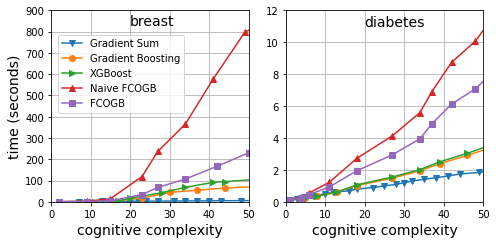

In [94]:
plot_times_comp([breast_gpe, dia_gpe], [breast_xgb, dia_xgb], [breast_orth, dia_orth], [breast_fast, dia_orth_new], 
                [breast_mwg, dia_mwg], [breast_gpe_comp, dia_gpe_comp], [breast_xgb_comp, dia_xgb_comp], 
                [breast_orth_comp, dia_orth_comp],
                [breast_orth_new_comp,  dia_orth_new_comp], [breast_mwg_comp, dia_mwg_comp],
                'combined_time_comp.pdf', show_label=True, xlim=[0,50])